In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\PROGRAMS\\dataset.csv')

In [3]:
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mothers qualification  Fathers qualification  Mothers occupation  ...  \
0                     13                     10                   6  ...   
1                      1                      3                   4  ...   
2                     22                     27                  10  ...   
3                     23                     27                   6  ...   
4                     22                     28                  10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [4]:
print("The data has ",df.shape[0],"rows and ",df.shape[1], "columns")

The data has  4424 rows and  35 columns


In [5]:
print("Target variable contains :")
df['Target'].value_counts()

Target variable contains :


Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [6]:
# data types
print("Data SET:\n")
display(df.dtypes.sort_index())

Data SET:



Age at enrollment                                   int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Curricular units 1st sem (approved)                 int64
Curricular units 1st sem (credited)                 int64
Curricular units 1st sem (enrolled)                 int64
Curricular units 1st sem (evaluations)              int64
Curricular units 1st sem (grade)                  float64
Curricular units 1st sem (without evaluations)      int64
Curricular units 2nd sem (approved)                 int64
Curricular units 2nd sem (credited)                 int64
Curricular units 2nd sem (enrolled)                 int64
Curricular units 2nd sem (evaluations)              int64
Curricular units 2nd sem (grade)                  float64
Curricular units 2nd sem (without evaluations)      int64
Daytime/evening attendance                          int64
Debtor        

In [7]:
columns_to_convert = ['Marital status','International','Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 'Mothers qualification', 'Fathers qualification', 'Mothers occupation', 'Fathers occupation', 'Displaced', 'Debtor', 'Educational special needs', 'Tuition fees up to date', 'Gender', 'Scholarship holder']

# Convert selected columns to categorical
df[columns_to_convert] = df[columns_to_convert].astype('object')
df.dtypes

Marital status                                     object
Application mode                                   object
Application order                                   int64
Course                                             object
Daytime/evening attendance                         object
Previous qualification                             object
Nacionality                                        object
Mothers qualification                              object
Fathers qualification                              object
Mothers occupation                                 object
Fathers occupation                                 object
Displaced                                          object
Educational special needs                          object
Debtor                                             object
Tuition fees up to date                            object
Gender                                             object
Scholarship holder                                 object
Age at enrollm

In [8]:
#This shows us that certain categorical features have been given int as their datatype which needs to be corrected.

In [9]:
# missing values
print('NUMBER OF  MISSING VALUES: \n')
display(df.isnull().sum().sort_values(ascending=False))

NUMBER OF  MISSING VALUES: 



Marital status                                    0
Curricular units 2nd sem (enrolled)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (evaluations)            0
International                                     0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Curricular units 1st sem (credited)               0
Age at enrollment                                 0
Application mode                                  0
Fathers qual

In [10]:
# Thus our data does not contain any missing values

In [11]:
#  checking for duplicated rows
df.duplicated(keep=False).sum()

0

In [12]:
#Data cleaning

In [13]:
# number of unique categories in categorical features
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols].nunique().sort_values(ascending=False)

Fathers occupation            46
Fathers qualification         34
Mothers occupation            32
Mothers qualification         29
Nacionality                   21
Application mode              18
Course                        17
Previous qualification        17
Marital status                 6
Target                         3
Daytime/evening attendance     2
Displaced                      2
Educational special needs      2
Debtor                         2
Tuition fees up to date        2
Gender                         2
Scholarship holder             2
International                  2
dtype: int64

In [14]:
columns = df.select_dtypes(include=['float', int]).columns

for col in columns:
    max_value = df[col].max()
    min_value = df[col].min()
    print(f"For feature {col} range is [{min_value} to {max_value}]")


For feature Application order range is [0 to 9]
For feature Age at enrollment range is [17 to 70]
For feature Curricular units 1st sem (credited) range is [0 to 20]
For feature Curricular units 1st sem (enrolled) range is [0 to 26]
For feature Curricular units 1st sem (evaluations) range is [0 to 45]
For feature Curricular units 1st sem (approved) range is [0 to 26]
For feature Curricular units 1st sem (grade) range is [0.0 to 18.875]
For feature Curricular units 1st sem (without evaluations) range is [0 to 12]
For feature Curricular units 2nd sem (credited) range is [0 to 19]
For feature Curricular units 2nd sem (enrolled) range is [0 to 23]
For feature Curricular units 2nd sem (evaluations) range is [0 to 33]
For feature Curricular units 2nd sem (approved) range is [0 to 20]
For feature Curricular units 2nd sem (grade) range is [0.0 to 18.57142857]
For feature Curricular units 2nd sem (without evaluations) range is [0 to 12]
For feature Unemployment rate range is [7.6 to 16.2]
For fe

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Age at enrollment', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


In [16]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', '

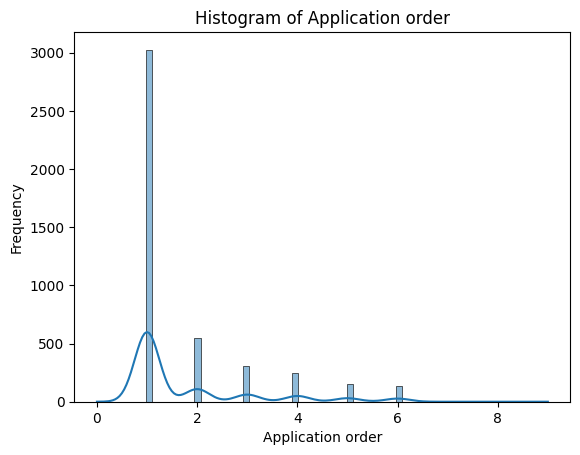

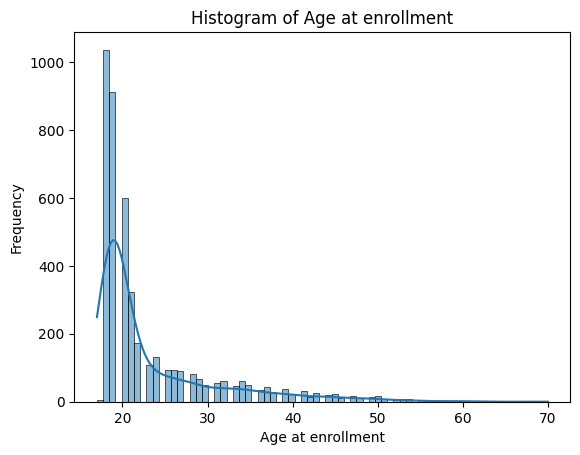

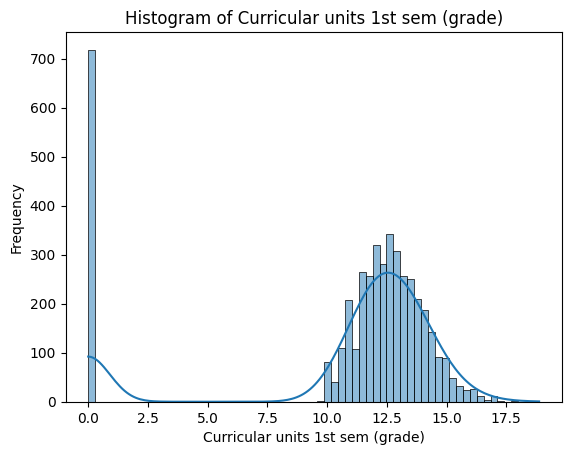

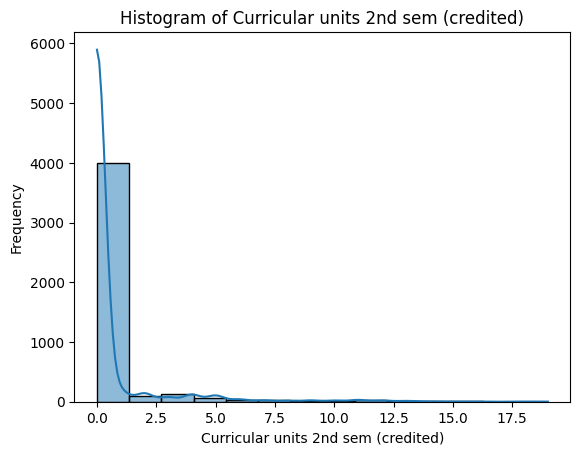

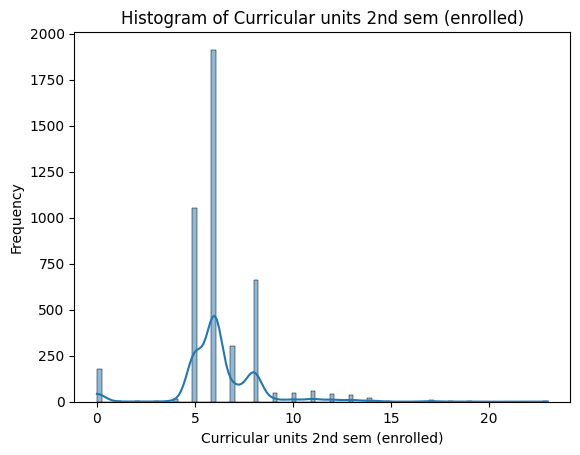

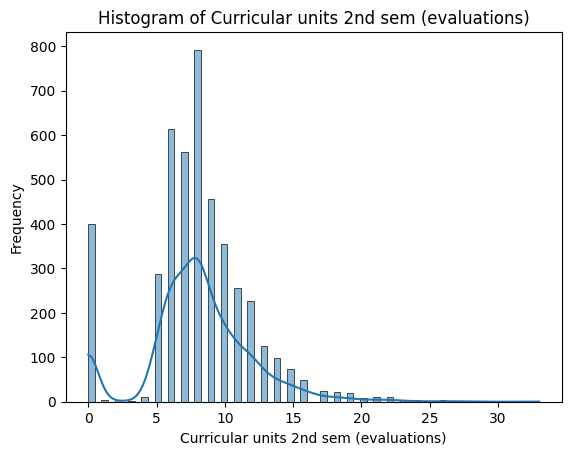

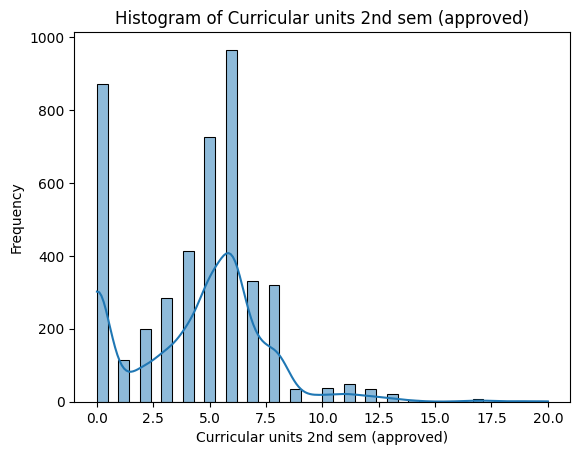

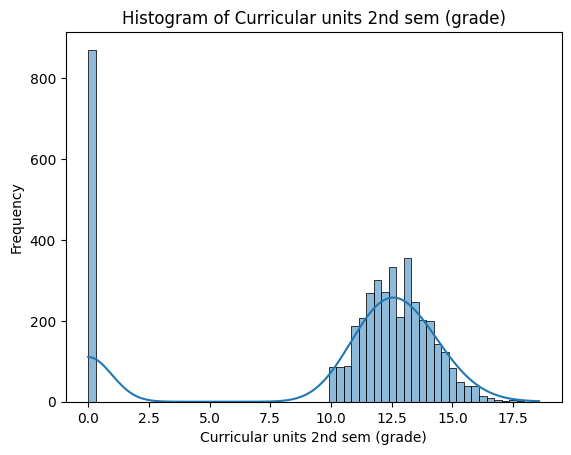

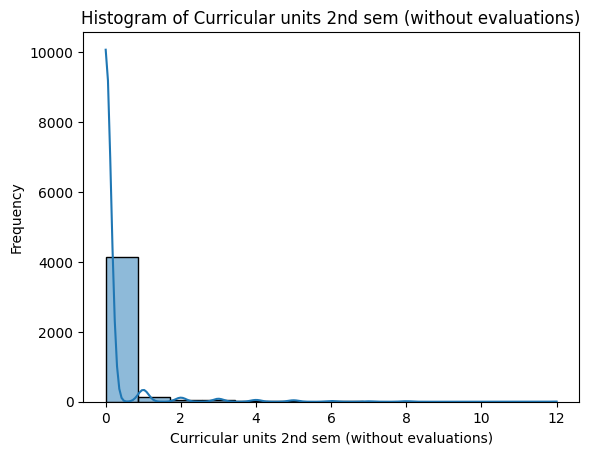

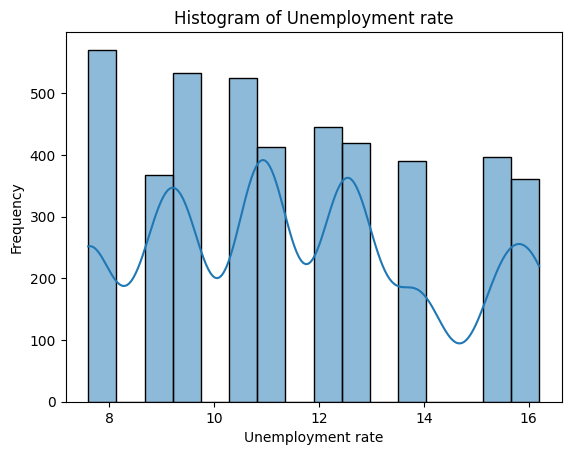

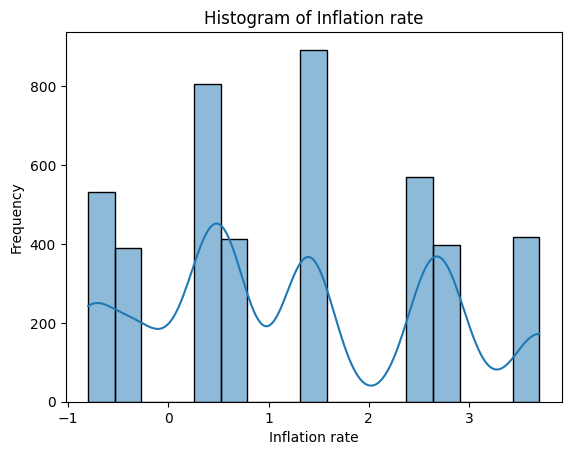

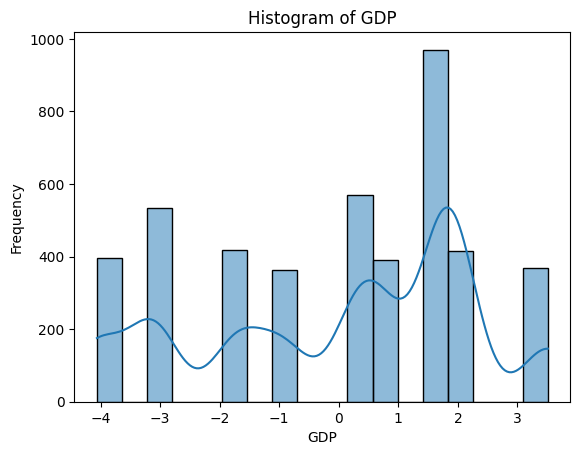

In [17]:
columns = df.select_dtypes(include=['float', int]).columns

for col in columns:
    sns.histplot(data=df, x=col, kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

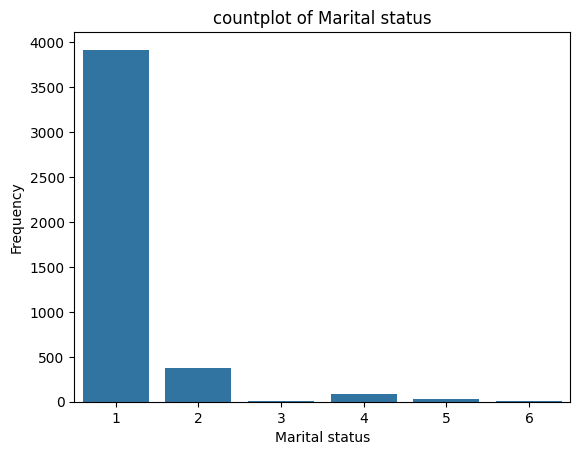

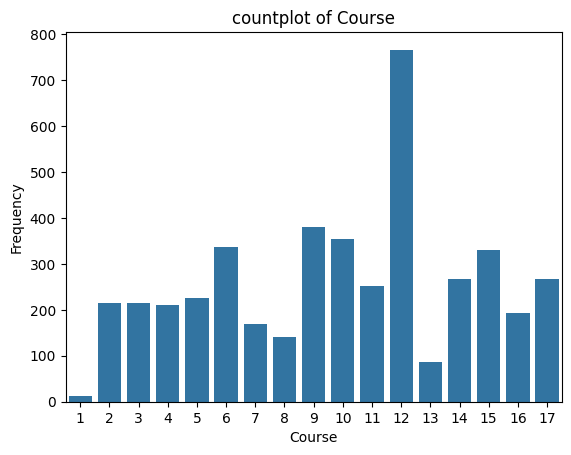

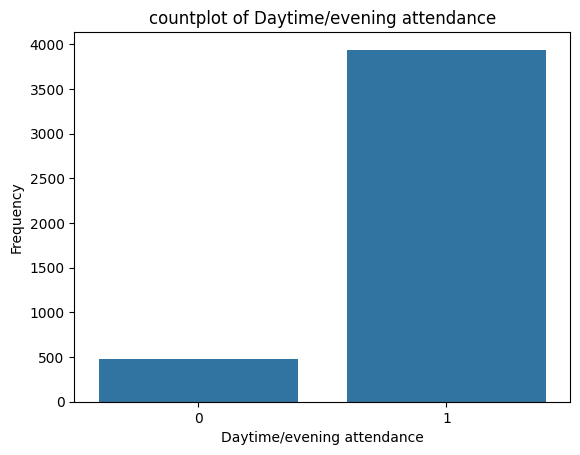

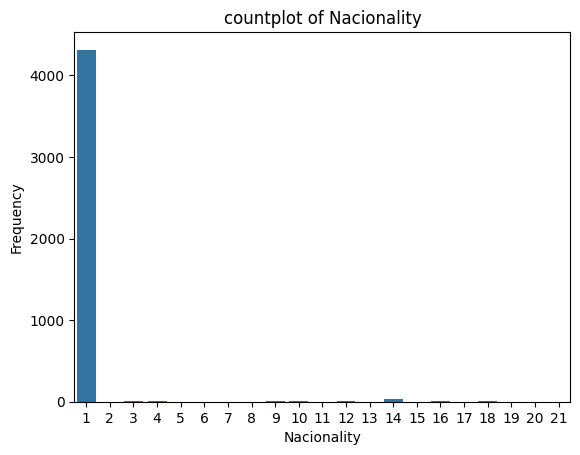

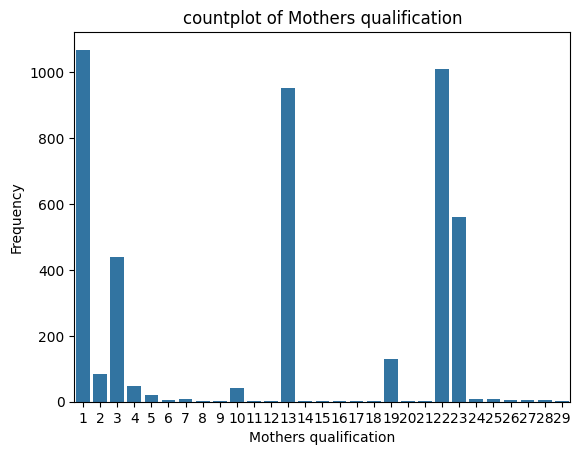

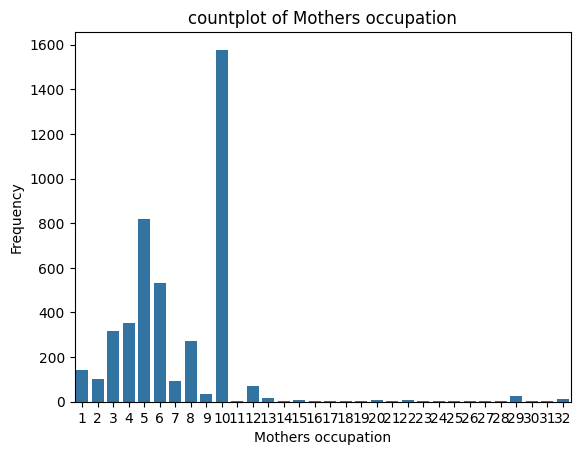

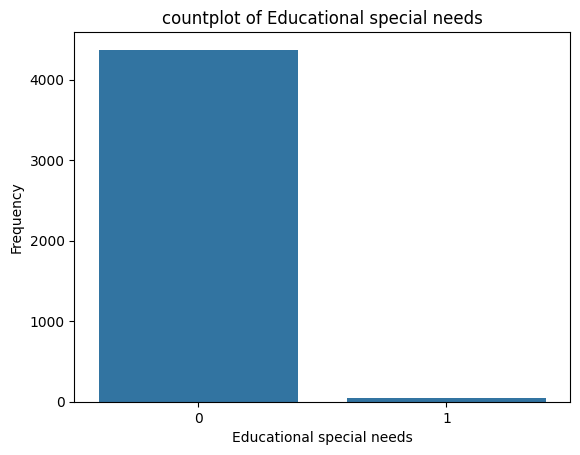

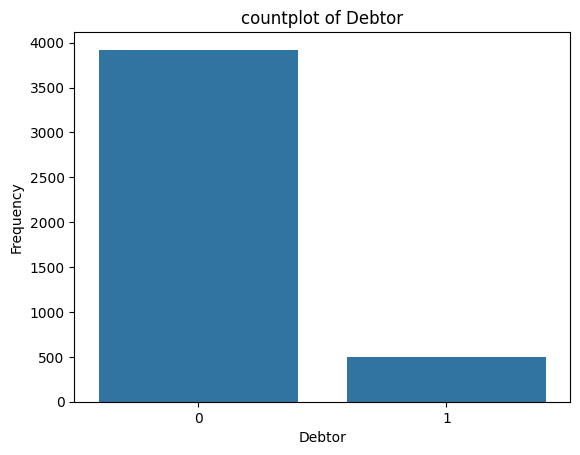

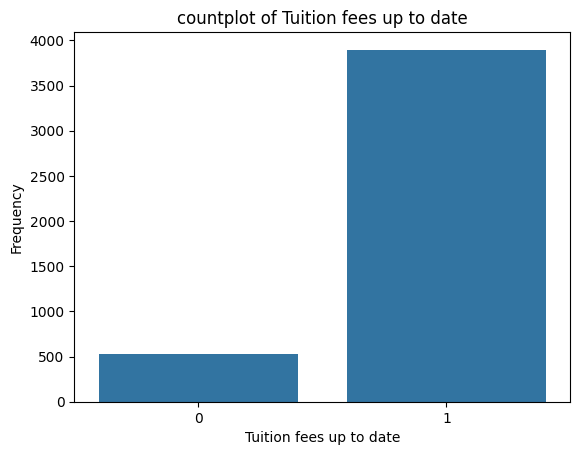

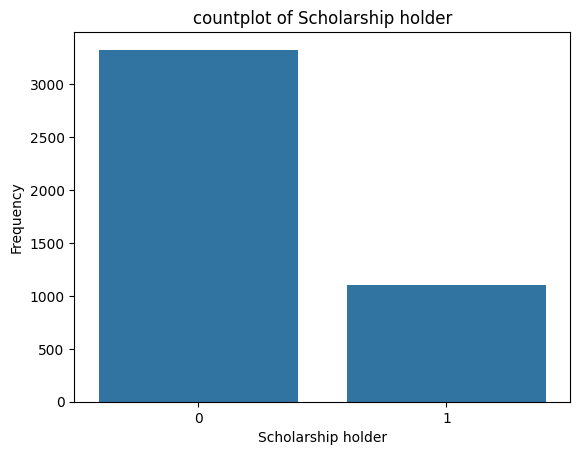

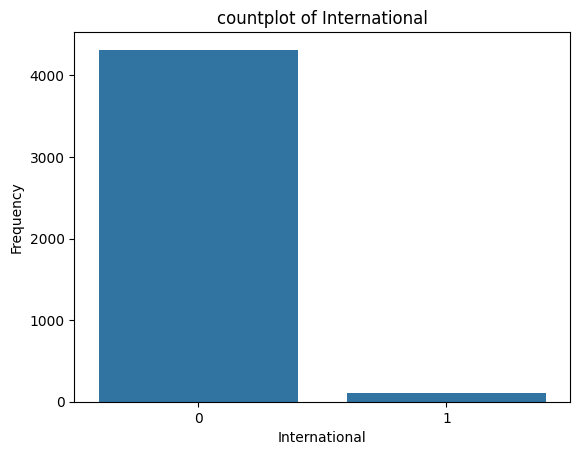

In [18]:
columns = df.select_dtypes(include=['object']).columns

for col in columns:
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'countplot of {col}')
    plt.show()

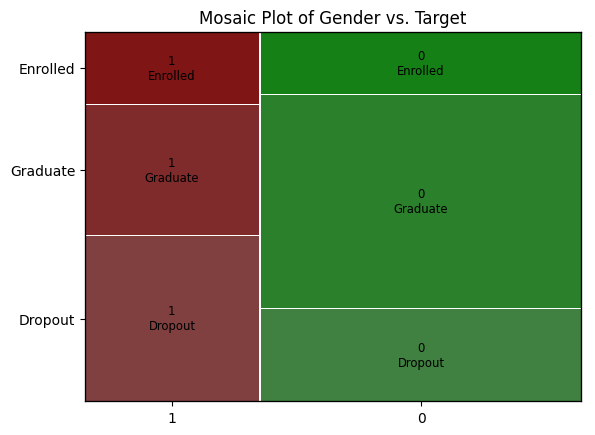

In [19]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['Gender', 'Target'], title='Mosaic Plot of Gender vs. Target')
plt.show()


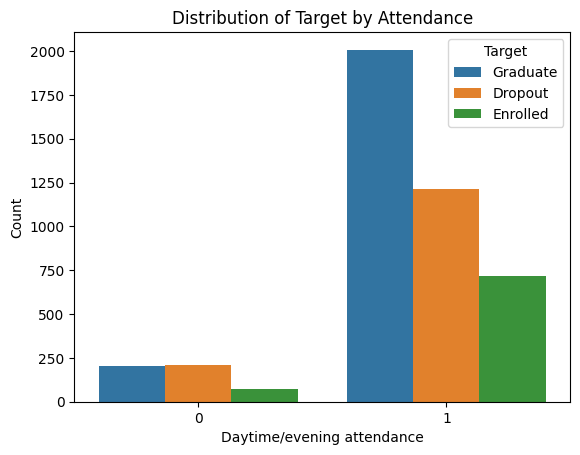

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Daytime/evening attendance', hue='Target')
plt.xlabel('Daytime/evening attendance')
plt.ylabel('Count')
plt.title('Distribution of Target by Attendance')
plt.show()


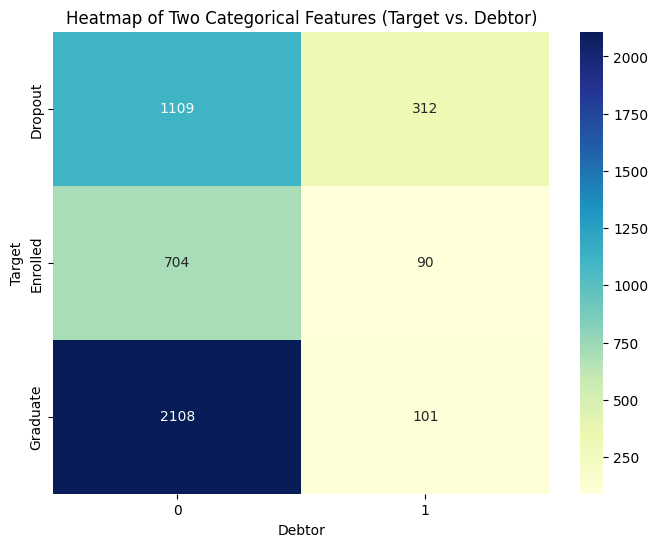

In [21]:
contingency_table = pd.crosstab(df['Target'], df['Debtor'])

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Debtor')
plt.ylabel('Target')
plt.title('Heatmap of Two Categorical Features (Target vs. Debtor)')
plt.show()

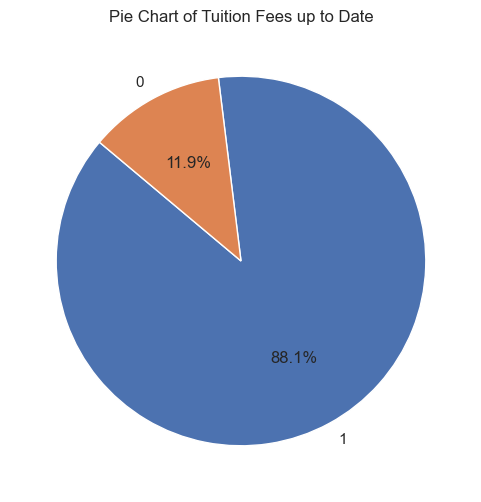

In [22]:
tuition_fee_counts = df['Tuition fees up to date'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
plt.pie(tuition_fee_counts, labels=tuition_fee_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Tuition Fees up to Date')
plt.show()

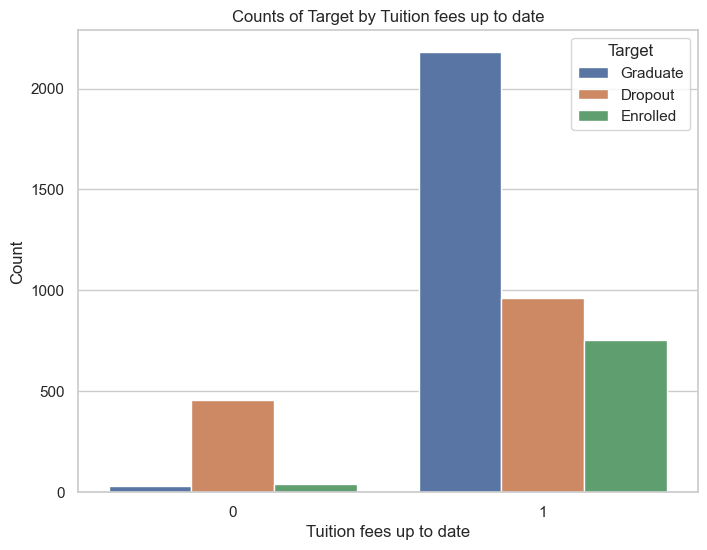

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Tuition fees up to date', hue='Target')
plt.xlabel('Tuition fees up to date')
plt.ylabel('Count')
plt.title('Counts of Target by Tuition fees up to date')
plt.show()

In [24]:
df['Scholarship holder'].value_counts()

0    3325
1    1099
Name: Scholarship holder, dtype: int64

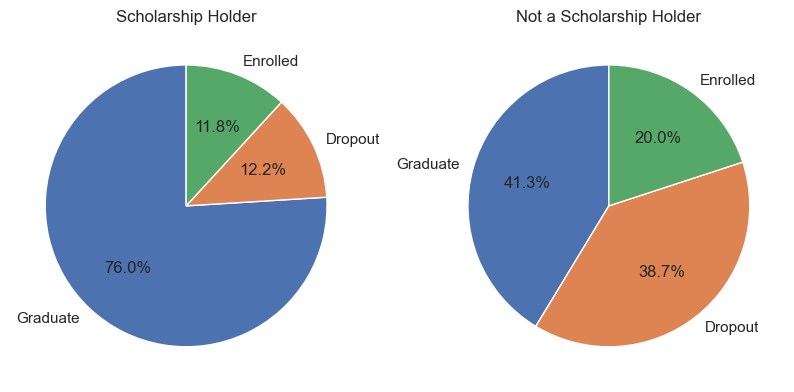

In [25]:
scholarship_counts = df[df['Scholarship holder'] == 1]['Target'].value_counts()
no_scholarship_counts = df[df['Scholarship holder'] == 0]['Target'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].pie(scholarship_counts, labels=scholarship_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Scholarship Holder')
axes[1].pie(no_scholarship_counts, labels=no_scholarship_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Not a Scholarship Holder')
plt.show()


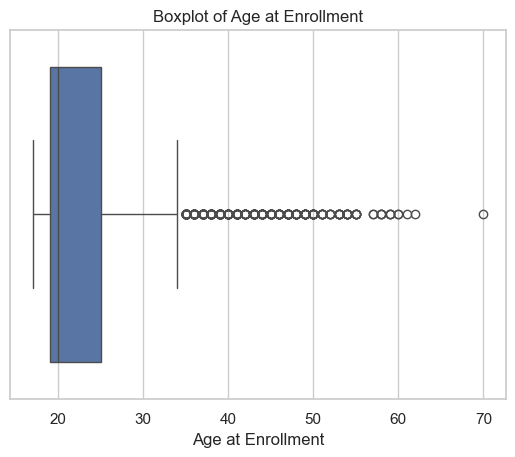

In [26]:
sns.boxplot(data=df, x='Age at enrollment')
plt.xlabel('Age at Enrollment')
plt.title('Boxplot of Age at Enrollment')
plt.show()

In [27]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', '

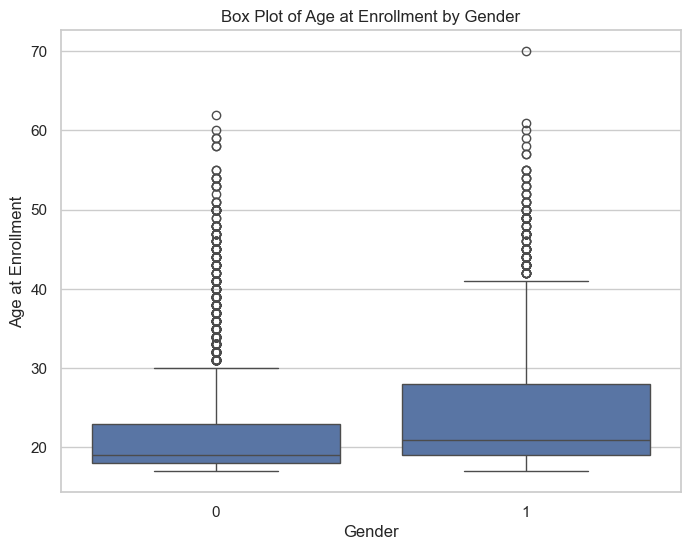

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Age at enrollment')
plt.xlabel('Gender')
plt.ylabel('Age at Enrollment')
plt.title('Box Plot of Age at Enrollment by Gender')
plt.show()


C:\Windows\Temp\ipykernel_12936\3632514330.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Gender', y='Curricular units 1st sem (grade)', ci='sd')


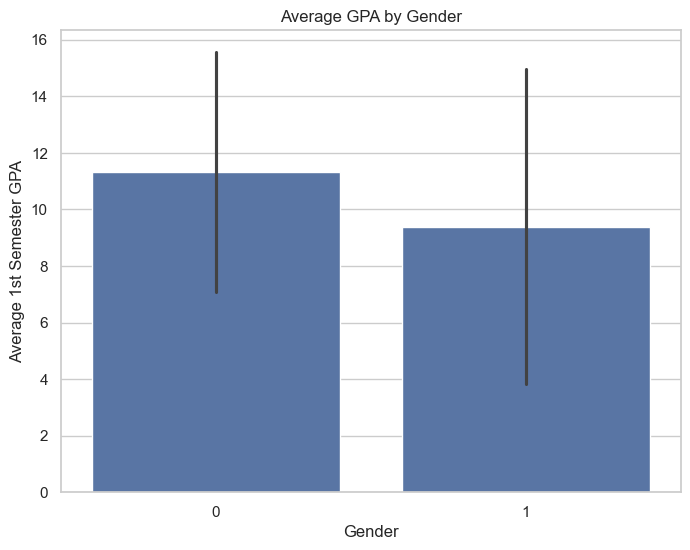

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='Curricular units 1st sem (grade)', ci='sd')
plt.xlabel('Gender')
plt.ylabel('Average 1st Semester GPA')
plt.title('Average GPA by Gender')
plt.show()


Text(0.5, 1.0, 'Target Distribution Among Non-International Students')

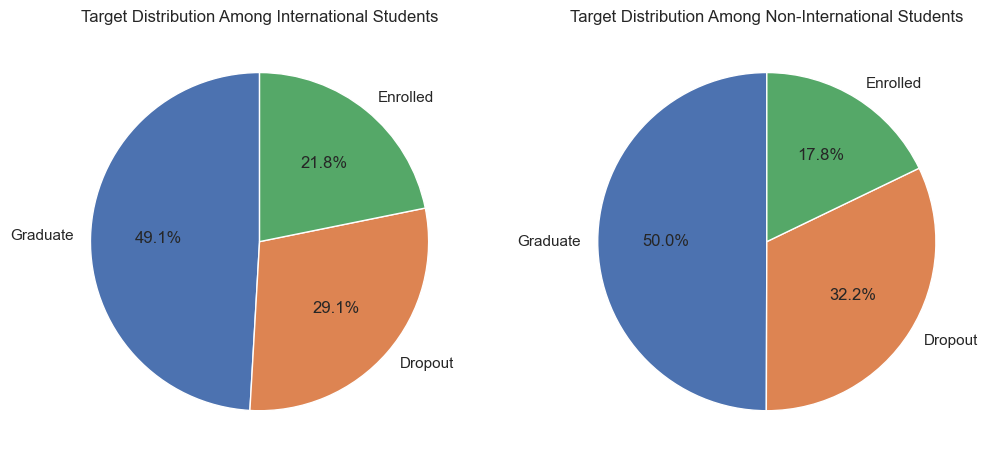

In [33]:
import matplotlib.pyplot as plt

# Filter the DataFrame for international students (assuming 1 represents international)
international_students = df[df['International'] == 1]
# Filter the DataFrame for non-international students (assuming 0 represents non-international)
non_international_students = df[df['International'] == 0]

# Calculate the distribution of 'Target' within international students
target_distribution_international = international_students['Target'].value_counts()
# Calculate the distribution of 'Target' within non-international students
target_distribution_non_international = non_international_students['Target'].value_counts()

# Create subplots for the two pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for international students
axes[0].pie(target_distribution_international, labels=target_distribution_international.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Target Distribution Among International Students')

# Pie chart for non-international students
axes[1].pie(target_distribution_non_international, labels=target_distribution_non_international.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Target Distribution Among Non-International Students')



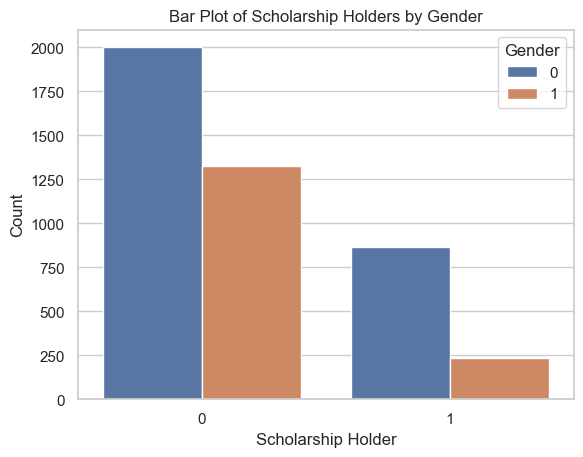

In [34]:
sns.countplot(data=df, x='Scholarship holder', hue='Gender')
plt.xlabel('Scholarship Holder')
plt.ylabel('Count')
plt.title('Bar Plot of Scholarship Holders by Gender')
plt.legend(title='Gender', loc='upper right')
plt.show()


In [37]:
con_feats = df.select_dtypes(include=['float', 'int']).columns
# info we need
info_cols = ['min', 'max', 'mean', '50%', 'std']

print("Training sets overview: ")
display(df[con_feats].describe().loc[info_cols])

Training sets overview: 


Application order  Age at enrollment  \
min            0.000000          17.000000   
max            9.000000          70.000000   
mean           1.727848          23.265145   
50%            1.000000          20.000000   
std            1.313793           7.587816   

      Curricular units 1st sem (credited)  \
min                              0.000000   
max                             20.000000   
mean                             0.709991   
50%                              0.000000   
std                              2.360507   

      Curricular units 1st sem (enrolled)  \
min                              0.000000   
max                             26.000000   
mean                             6.270570   
50%                              6.000000   
std                              2.480178   

      Curricular units 1st sem (evaluations)  \
min                                 0.000000   
max                                45.000000   
mean                                8.299051   
50%                                 8.000000   
std                                 4.179106   

      Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
min                              0.000000                          0.000000   
max                             26.000000                         18.875000   
mean                             4.706600                         10.640822   
50%                              5.000000                         12.285714   
std                              3.094238                          4.843663   

      Curricular units 1st sem (without evaluations)  \
min                                         0.000000   
max                                        12.000000   
mean                                        0.137658   
50%                                         0.000000   
std                                         0.690880   

      Curricular units 2nd sem (credited)  \
min                              0.000000   
max                             19.000000   
mean                             0.541817   
50%                              0.000000   
std                              1.918546   

      Curricular units 2nd sem (enrolled)  \
min                              0.000000   
max                             23.000000   
mean                             6.232143   
50%                              6.000000   
std                              2.195951   

      Curricular units 2nd sem (evaluations)  \
min                                 0.000000   
max                                33.000000   
mean                                8.063291   
50%                                 8.000000   
std                                 3.947951   

      Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
min                              0.000000                          0.000000   
max                             20.000000                         18.571429   
mean                             4.435805                         10.230206   
50%                              5.000000                         12.200000   
std                              3.014764                          5.210808   

      Curricular units 2nd sem (without evaluations)  Unemployment rate  \
min                                         0.000000           7.600000   
max                                        12.000000          16.200000   
mean                                        0.150316          11.566139   
50%                                         0.000000          11.100000   
std                                         0.753774           2.663850   

      Inflation rate       GDP  
min        -0.800000 -4.060000  
max         3.700000  3.510000  
mean        1.228029  0.001969  
50%         1.400000  0.320000  
std         1.382711  2.269935

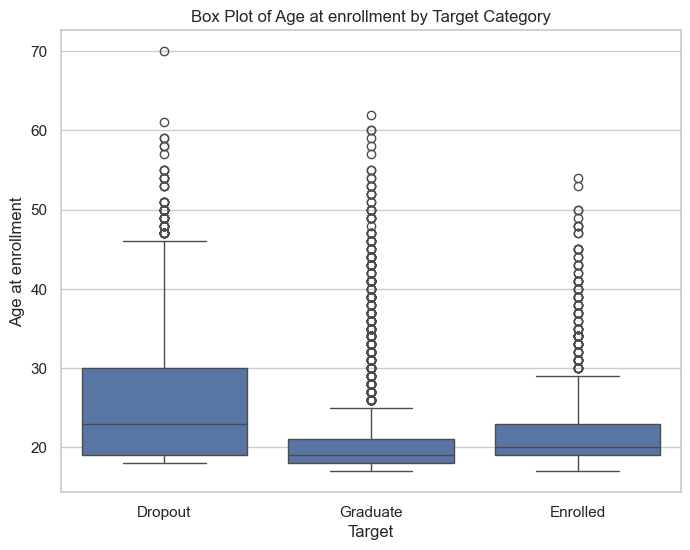

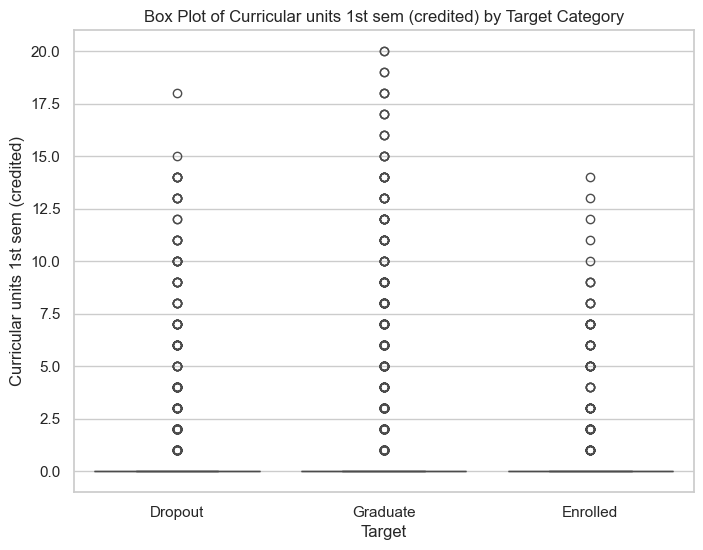

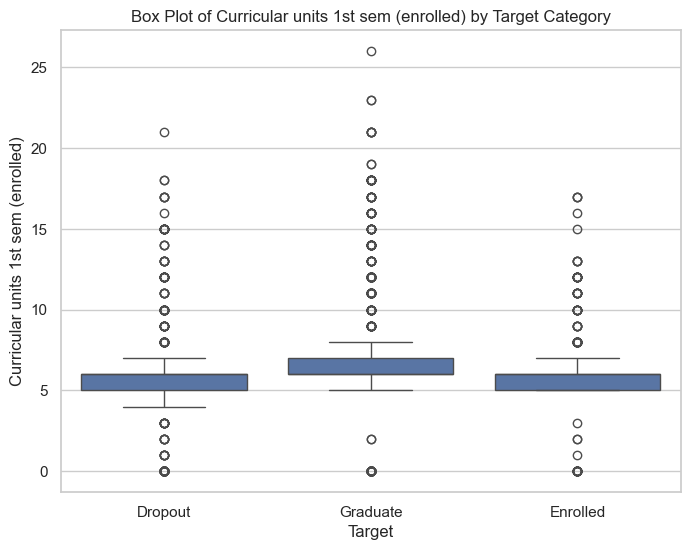

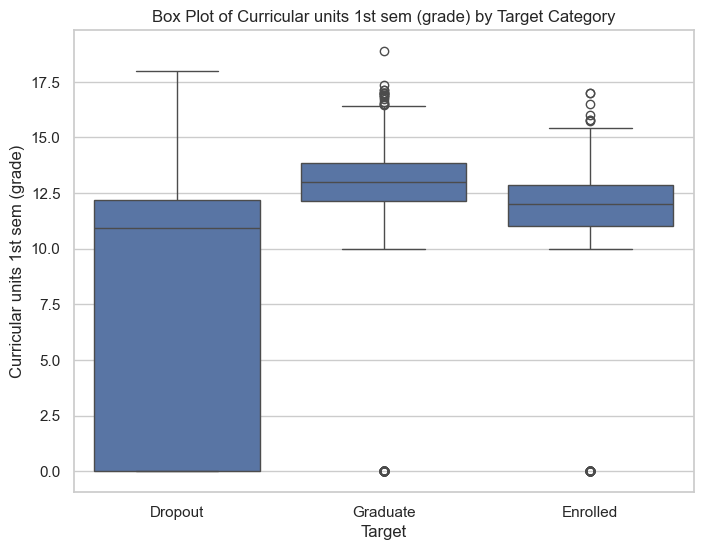

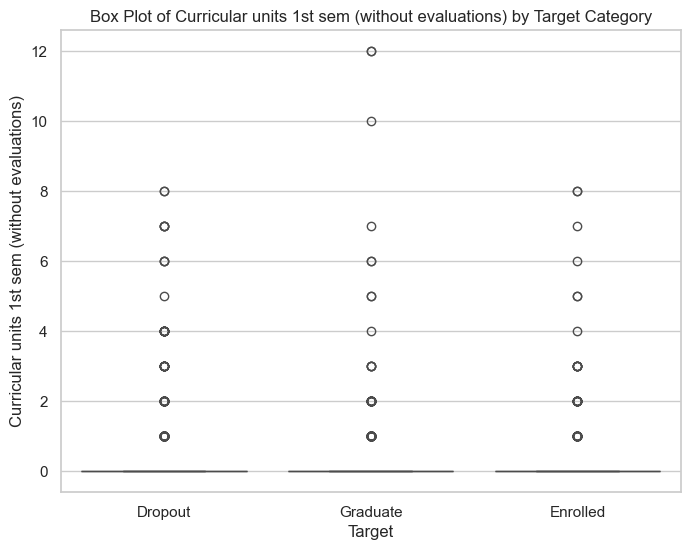

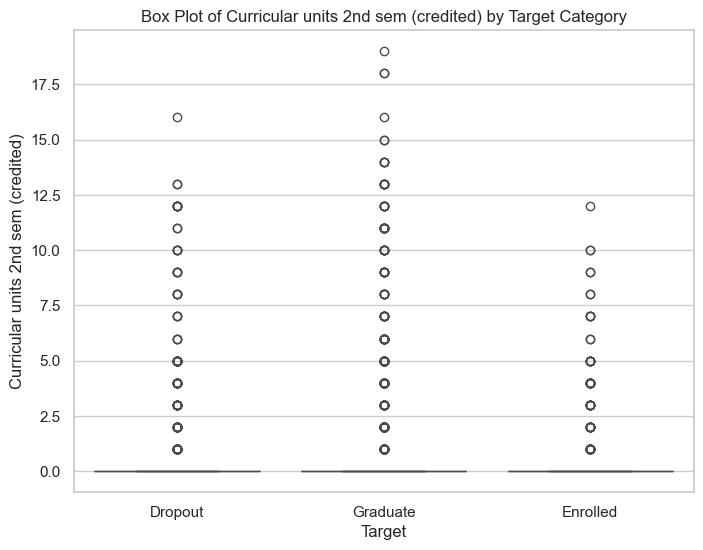

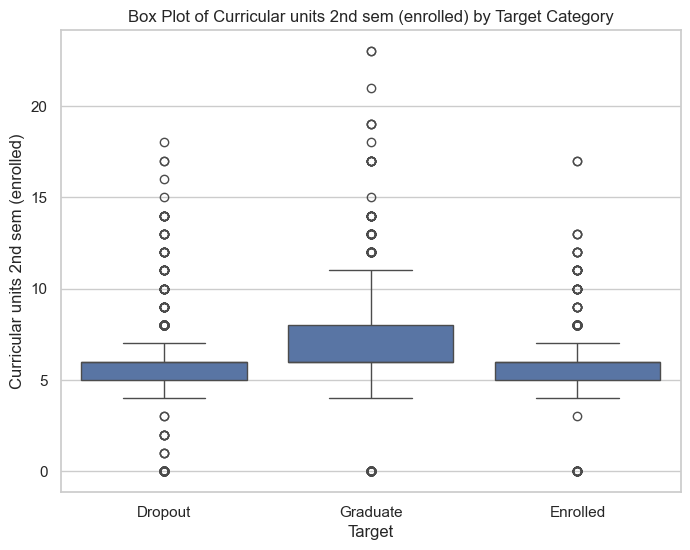

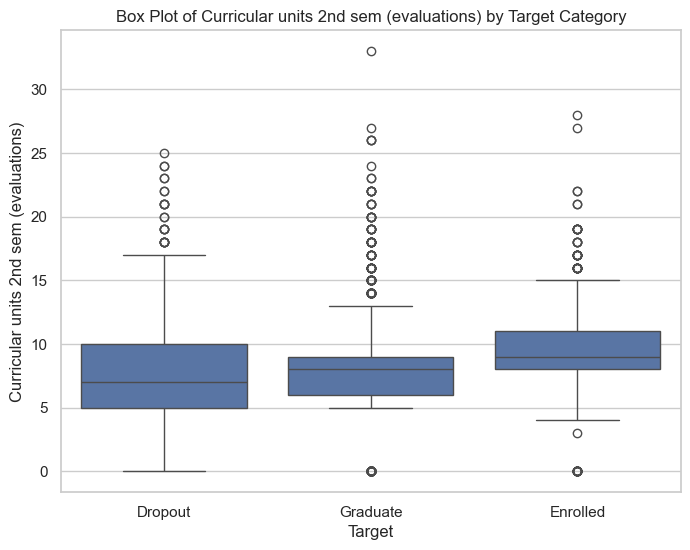

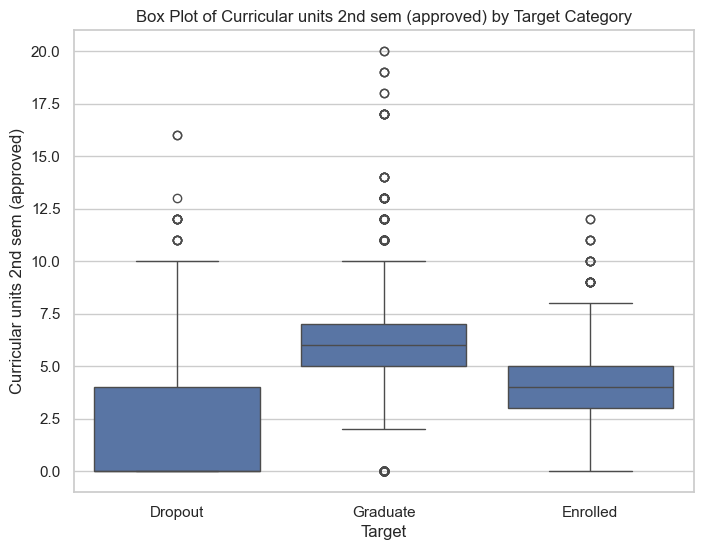

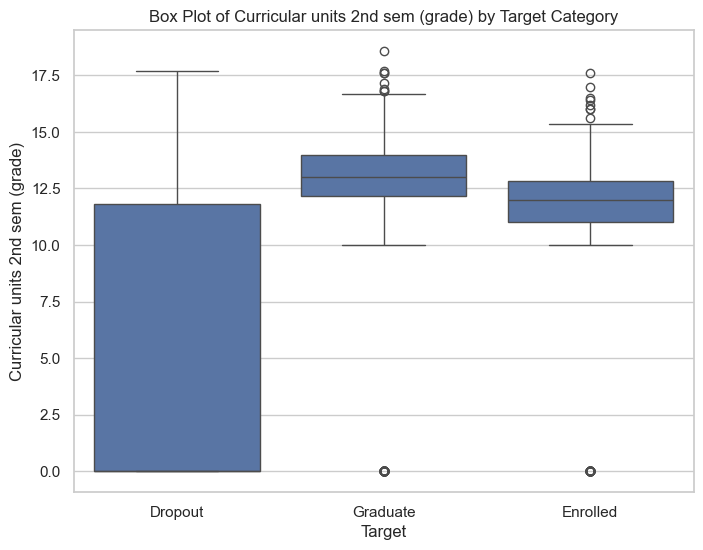

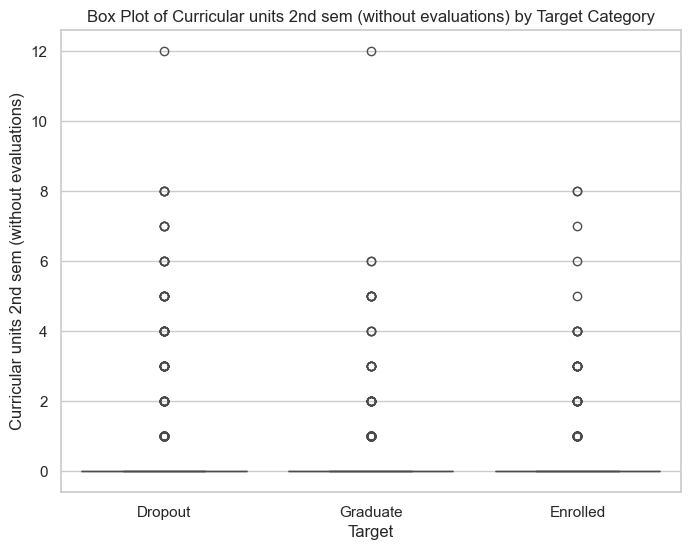

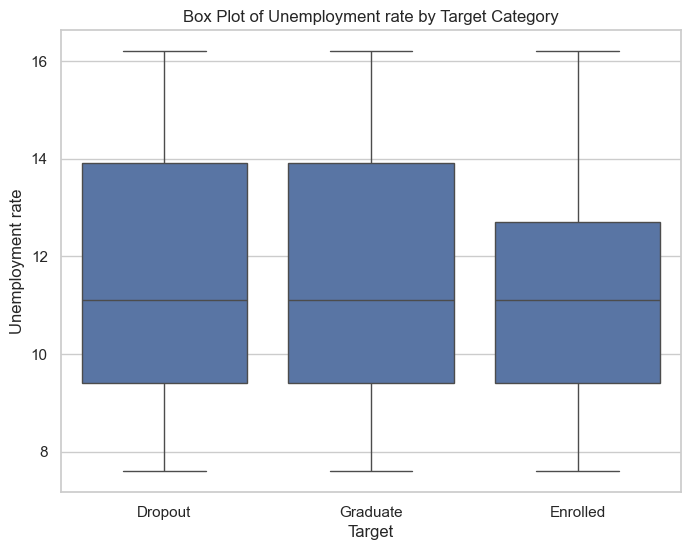

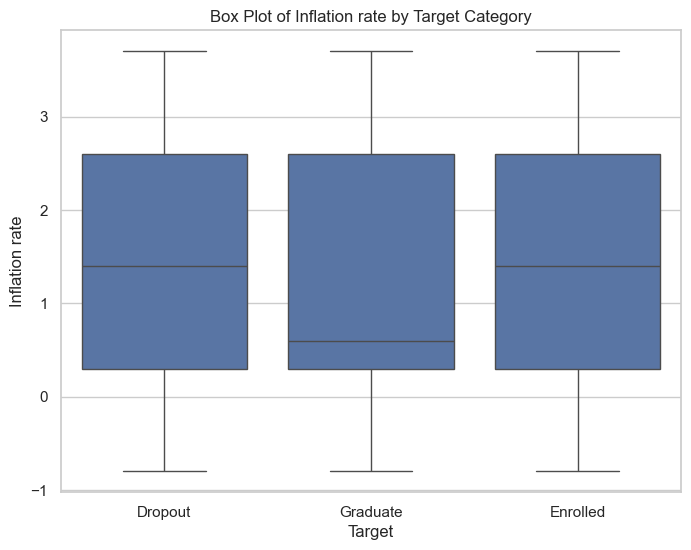

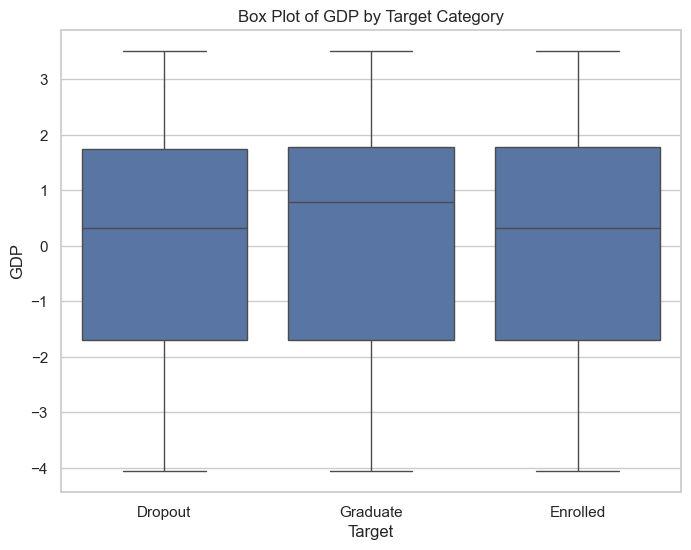

In [38]:
for feature in con_feats:
    if feature=='Application order':
        continue
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Target', y=feature)
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature} by Target Category')
    plt.show()

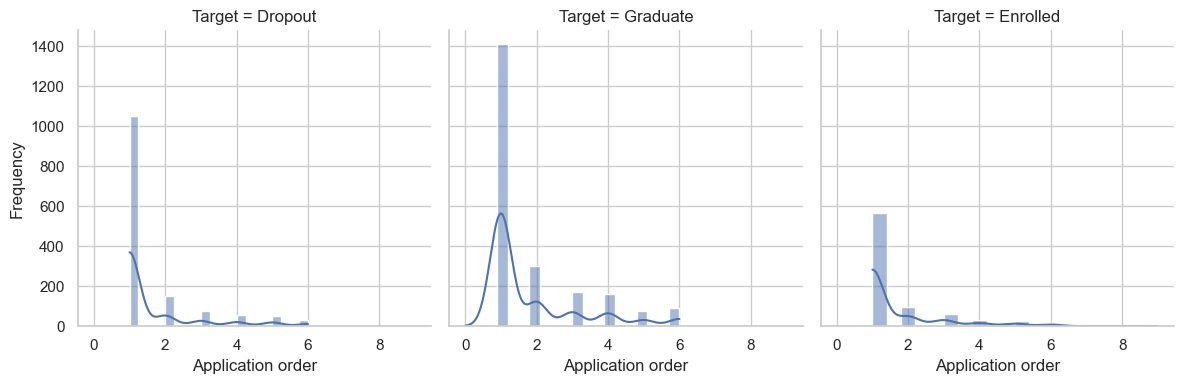

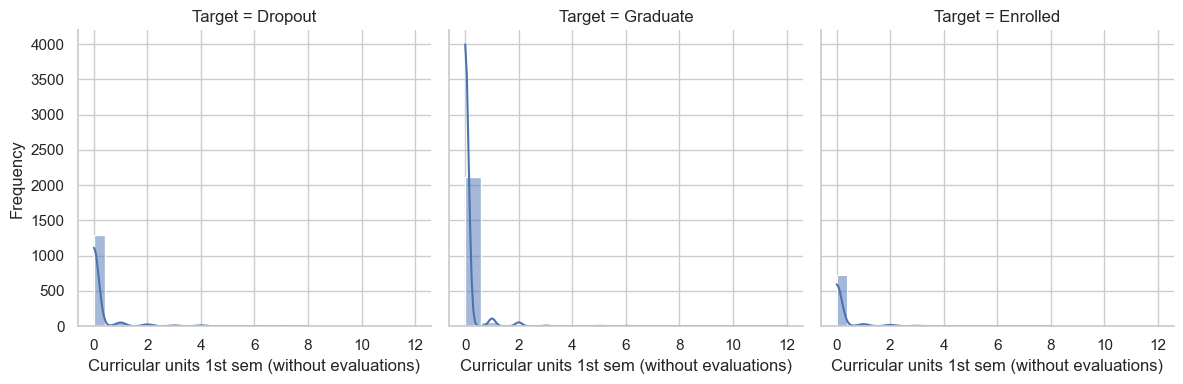

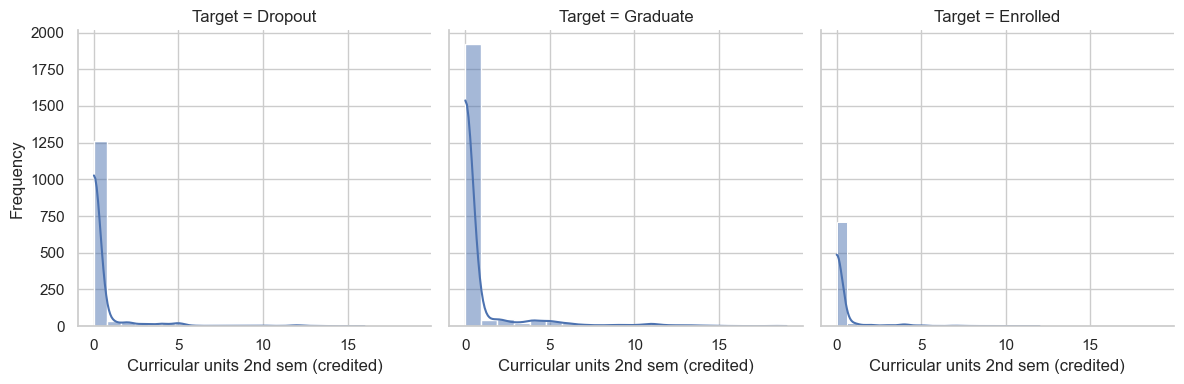

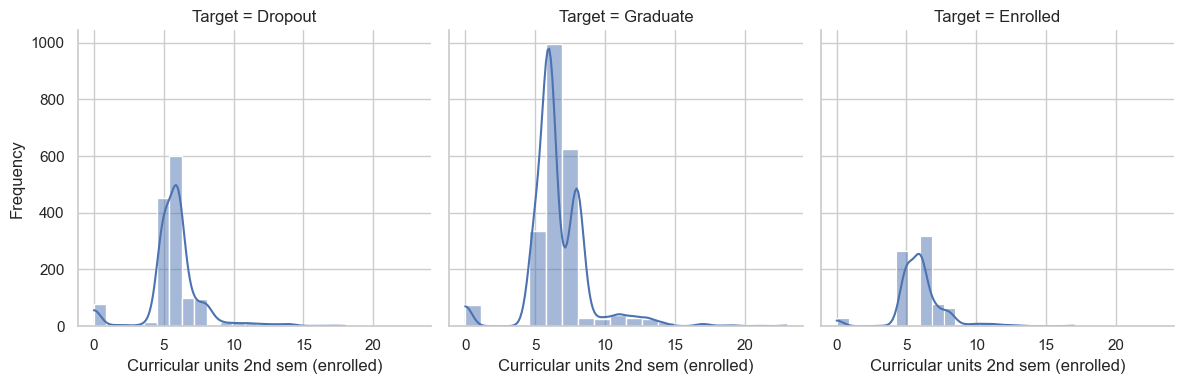

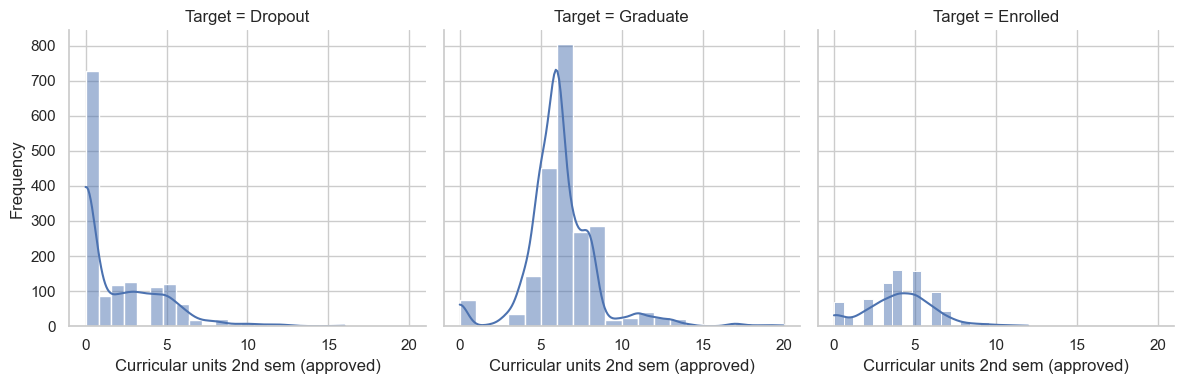

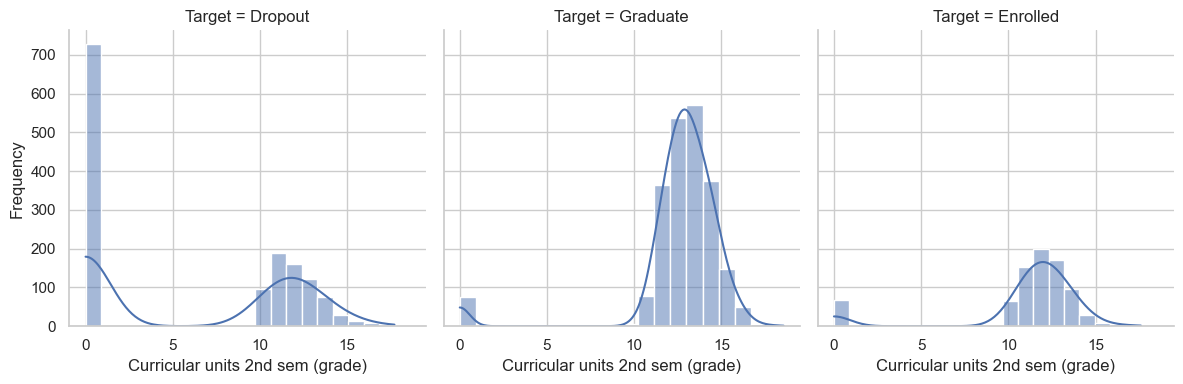

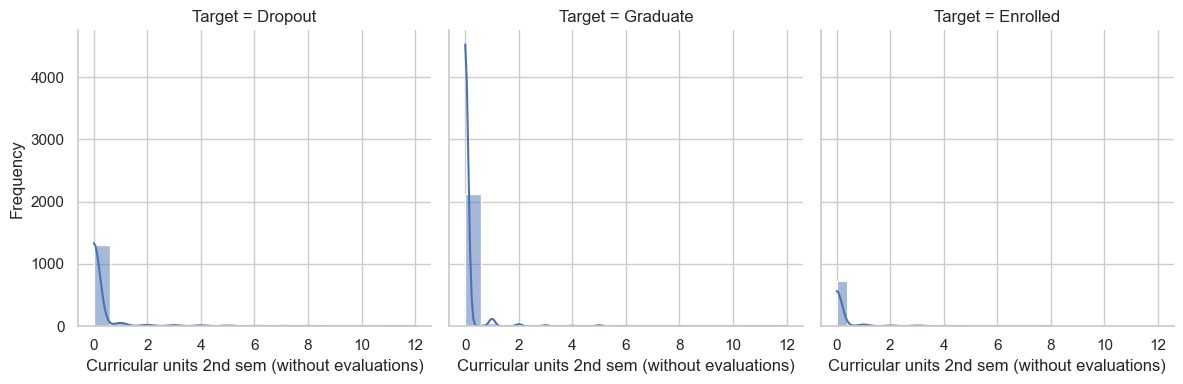

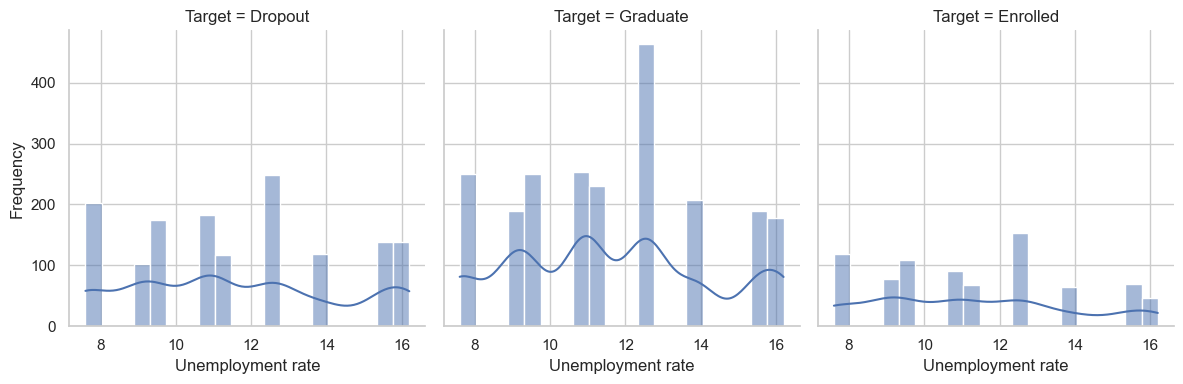

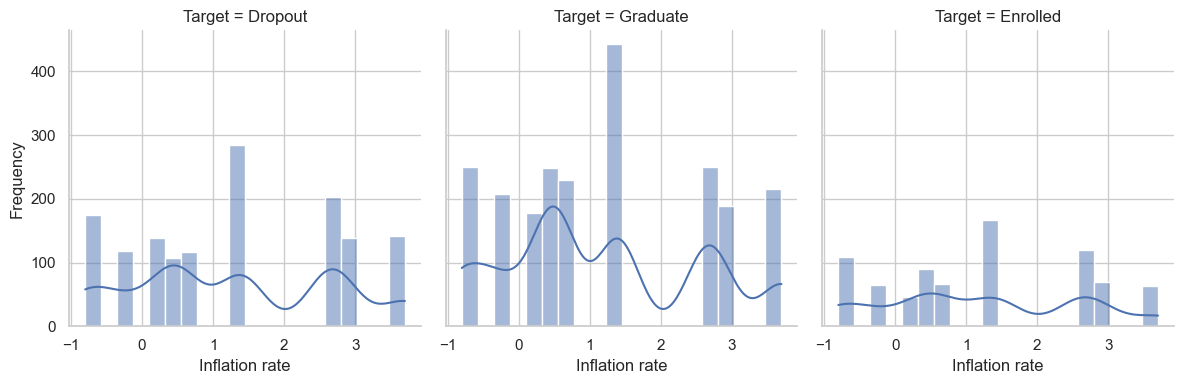

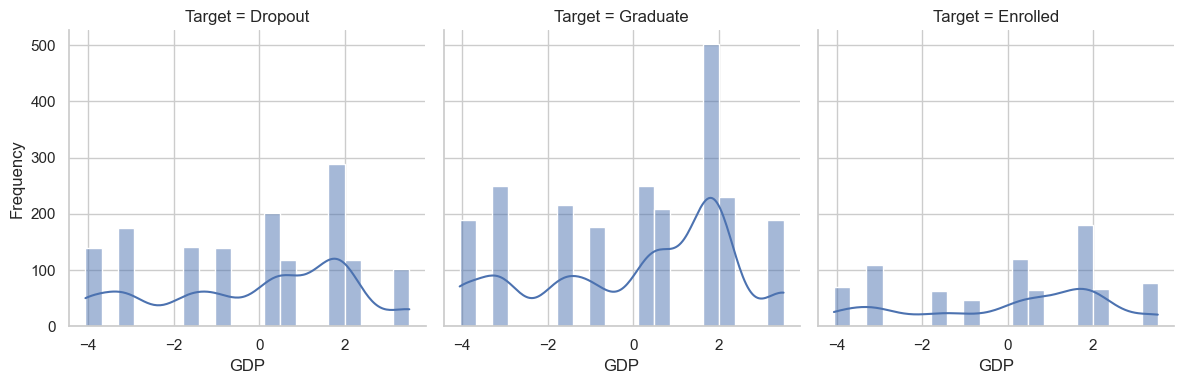

In [39]:
for feature in con_feats:
    g = sns.FacetGrid(df, col='Target', height=4, aspect=1)
    g.map(sns.histplot, feature, bins=20, kde=True)
    g.set_axis_labels(feature, 'Frequency')
    g.set_titles(col_template="Target = {col_name}")
    plt.show()


In [41]:
cat_feats = df.select_dtypes(include='object').columns
cat_feats

Index(['Marital status', 'Application mode', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'International', 'Target'],
      dtype='object')

C:\Windows\Temp\ipykernel_12936\2494411792.py:24: RuntimeWarning: divide by zero encountered in log10
  chi2_results['disparity'] = -np.log10(chi2_results['Pvals'].values)


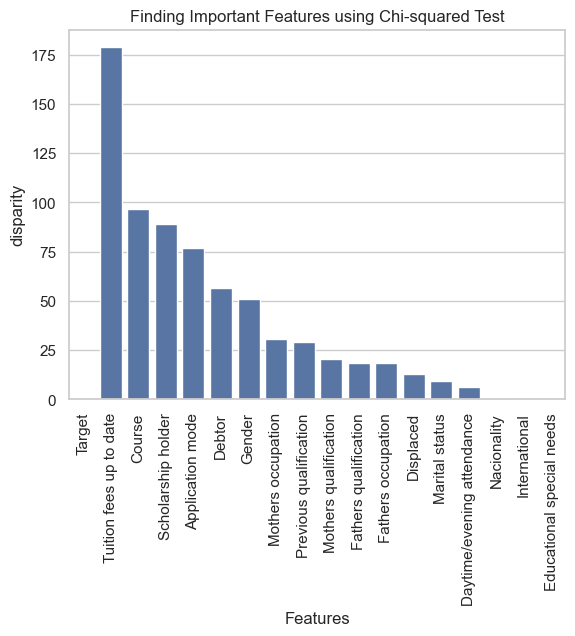

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Define your chi-squared test function
def chi2_test(frame):
    chi2_result = pd.DataFrame()
    chi2_result['Features'] = cat_feats
    pvals = []

    for feat in chi2_result['Features']:
        contingency_table = pd.crosstab(df[feat], df['Target'])
        chi2, pval, _, _ = chi2_contingency(contingency_table)
        pvals.append(pval)

    chi2_result['Pvals'] = pvals

    return chi2_result.sort_values(by='Pvals')

# Call the chi-squared test function
chi2_results = chi2_test(df)
chi2_results['disparity'] = -np.log10(chi2_results['Pvals'].values)
sns.barplot(data=chi2_results, x='Features', y='disparity')
plt.xticks(rotation=90)
plt.title("Finding Important Features using Chi-squared Test")
plt.show()

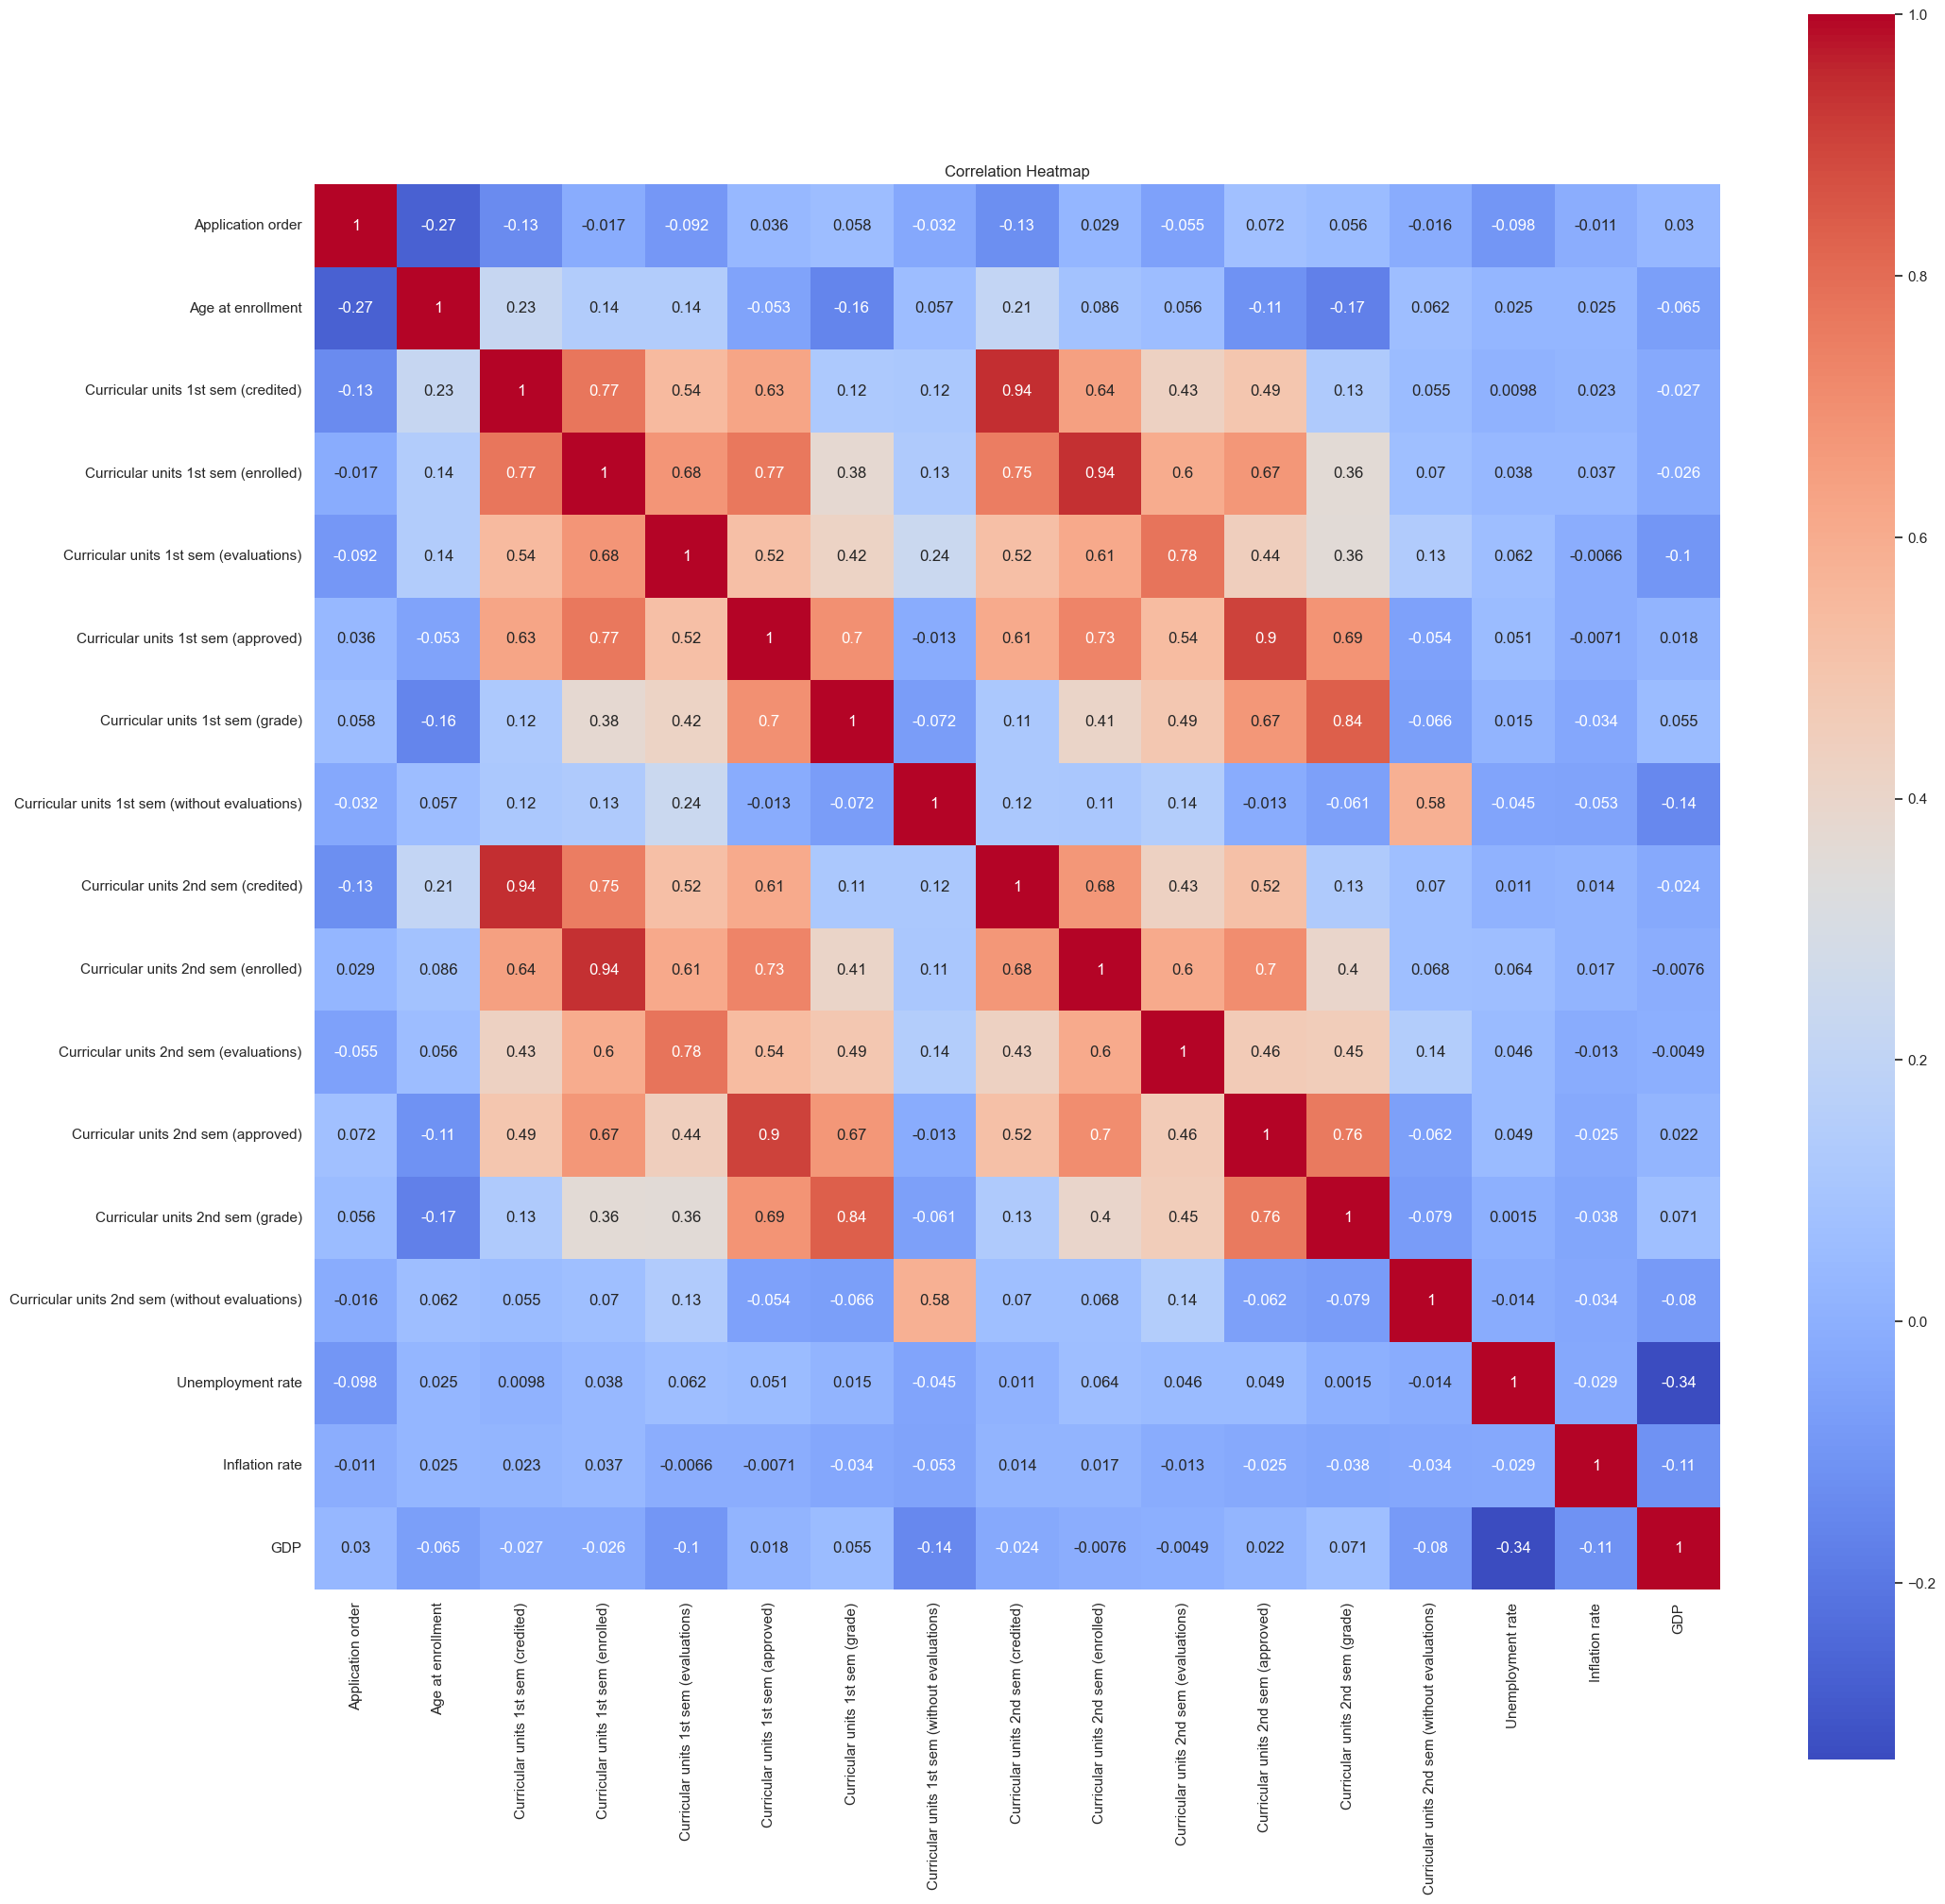

In [43]:
 plt.figure(figsize=(24, 24))
correlation_matrix = df[con_feats].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [44]:
#! pip install dataprep

In [45]:
#import dataprep

In [46]:
#from dataprep.eda import create_report, plot, plot_correlation, plot_missing, plot_diff

In [47]:
#report= create_report(df)
#report.show()

In [48]:
#! pip install mitosheet

In [49]:
#import mitosheet

In [50]:
#mitosheet.sheet(df,analysis_to_replay="id-awepdbadrm")

# Feature Selection


In [51]:
df.shape

(4424, 35)

In [52]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mothers qualification                             0
Fathers qualification                             0
Mothers occupation                                0
Fathers occupation                                0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [53]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Target' is the column with string labels
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

In [54]:
df

Marital status Application mode  Application order Course  \
0                 1                8                  5      2   
1                 1                6                  1     11   
2                 1                1                  5      5   
3                 1                8                  2     15   
4                 2               12                  1      3   
...             ...              ...                ...    ...   
4419              1                1                  6     15   
4420              1                1                  2     15   
4421              1                1                  1     12   
4422              1                1                  1      9   
4423              1                5                  1     15   

     Daytime/evening attendance Previous qualification Nacionality  \
0                             1                      1           1   
1                             1                      1           1   
2                             1                      1           1   
3                             1                      1           1   
4                             0                      1           1   
...                         ...                    ...         ...   
4419                          1                      1           1   
4420                          1                      1          19   
4421                          1                      1           1   
4422                          1                      1           1   
4423                          1                      1           9   

     Mothers qualification Fathers qualification Mothers occupation  ...  \
0                       13                    10                  6  ...   
1                        1                     3                  4  ...   
2                       22                    27                 10  ...   
3                       23                    27                  6  ...   
4                       22                    28                 10  ...   
...                    ...                   ...                ...  ...   
4419                     1                     1                  6  ...   
4420                     1                     1                 10  ...   
4421                    22                    27                 10  ...   
4422                    22                    27                  8  ...   
4423                    23                    27                  6  ...   

     Curricular units 2nd sem (credited) Curricular units 2nd sem (enrolled)  \
0                                      0                                   0   
1                                      0                                   6   
2                                      0                                   6   
3                                      0                                   6   
4                                      0                                   6   
...                                  ...                                 ...   
4419                                   0                                   6   
4420                                   0                                   6   
4421                                   0                                   8   
4422                                   0                                   5   
4423                                   0                                   6   

     Curricular units 2nd sem (evaluations)  \
0                                         0   
1                                         6   
2                                         0   
3                                        10   
4                                         6   
...                                     ...   
4419                                      8   
4420                                      6   
4421                                      9   
4422                       

## Mutual Info Classif


Top 14 Most Important Features:
                                   Feature  Importance
28     Curricular units 2nd sem (approved)    0.310535
29        Curricular units 2nd sem (grade)    0.246520
22     Curricular units 1st sem (approved)    0.236049
23        Curricular units 1st sem (grade)    0.195271
27  Curricular units 2nd sem (evaluations)    0.098848
14                 Tuition fees up to date    0.078551
21  Curricular units 1st sem (evaluations)    0.076508
1                         Application mode    0.061482
3                                   Course    0.059741
16                      Scholarship holder    0.056040
17                       Age at enrollment    0.055506
20     Curricular units 1st sem (enrolled)    0.040556
8                    Fathers qualification    0.034195
13                                  Debtor    0.031685


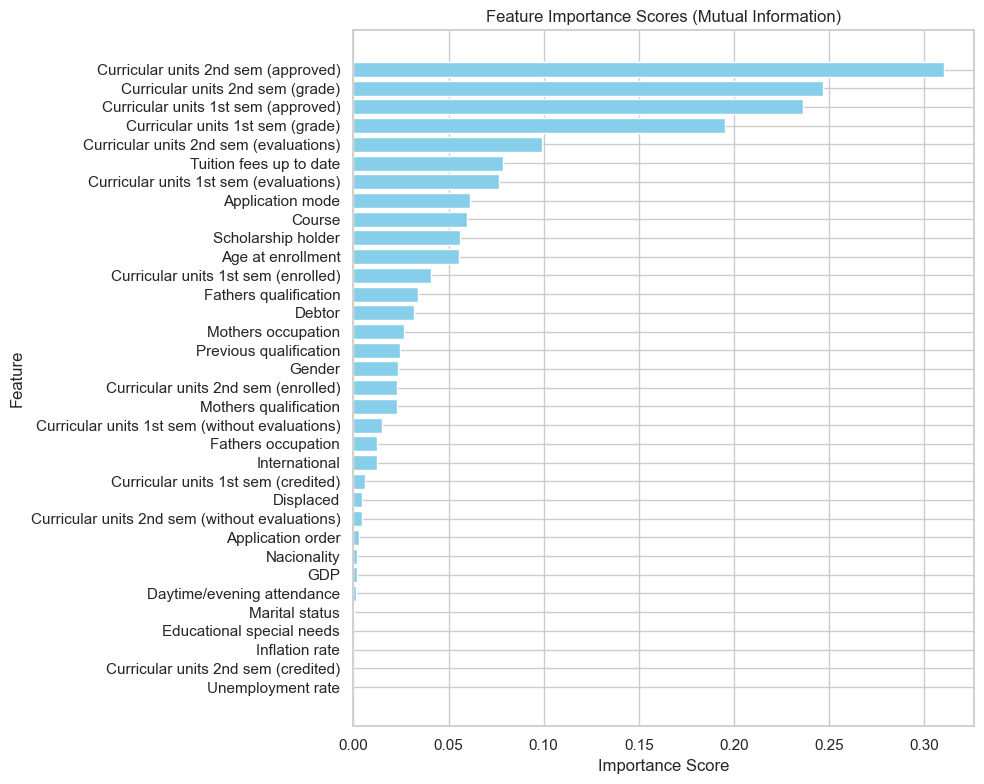


Mean Accuracy (Cross-Validated): 0.7679


In [55]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = df.drop('Target', axis=1)
y = df['Target']

random_seed = 42
np.random.seed(random_seed)

mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to hold feature names and their importance scores
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': mi_scores})

# Sort features by importance in ascending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)

# Print the top N most important features
top_n = 14
top_features = feature_importance.tail(top_n)[::-1]
print(f"\nTop {top_n} Most Important Features:")
print(top_features)

# Plotting horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Scores (Mutual Information)')
plt.tight_layout()
plt.show()

# Select the top N most important features
selected_features_mi = X[top_features['Feature']]

clf = RandomForestClassifier(random_state=random_seed)
accuracy_scores = cross_val_score(clf, selected_features_mi, y, cv=5, scoring='accuracy')

mean_accuracy = np.mean(accuracy_scores)
print(f"\nMean Accuracy (Cross-Validated): {mean_accuracy:.4f}")

## Feature Importance from Trees

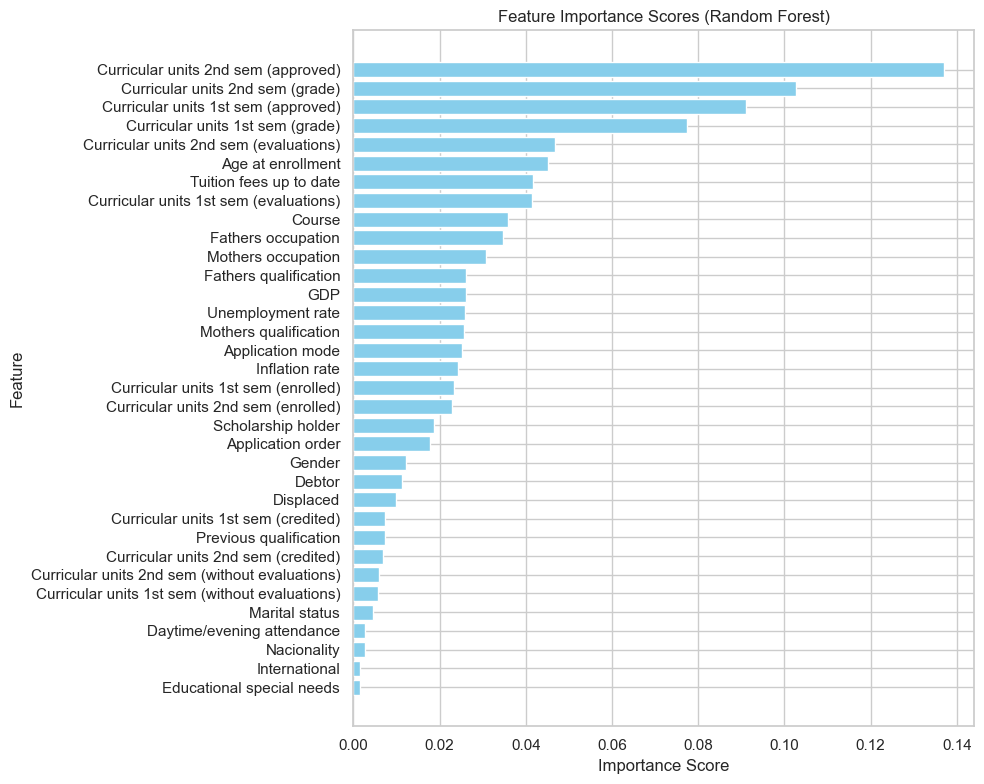


Top 14 Most Important Features (Random Forest) in Ascending Order:
                                   Feature  Importance
31                       Unemployment rate    0.025976
33                                     GDP    0.026023
8                    Fathers qualification    0.026236
9                       Mothers occupation    0.030789
10                      Fathers occupation    0.034733
3                                   Course    0.035874
21  Curricular units 1st sem (evaluations)    0.041347
14                 Tuition fees up to date    0.041700
17                       Age at enrollment    0.045074
27  Curricular units 2nd sem (evaluations)    0.046720
23        Curricular units 1st sem (grade)    0.077463
22     Curricular units 1st sem (approved)    0.091072
29        Curricular units 2nd sem (grade)    0.102578
28     Curricular units 2nd sem (approved)    0.137128

Mean Accuracy (Random Forest, Cross-Validated): 0.7658


In [56]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Target', axis=1)
y = df['Target']

random_seed = 42
np.random.seed(random_seed)

model_rf = RandomForestClassifier(random_state=random_seed)
model_rf.fit(X, y)

feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': model_rf.feature_importances_})

indices = np.argsort(feature_importance_rf['Importance'])
sorted_feature_importance_rf = feature_importance_rf.iloc[indices]

# Plotting horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_importance_rf['Feature'], sorted_feature_importance_rf['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Scores (Random Forest)')
plt.tight_layout()
plt.show()

top_n = 14
selected_features_rf = sorted_feature_importance_rf.tail(top_n)

# Print the selected features and their importance scores
print(f"\nTop {top_n} Most Important Features (Random Forest) in Ascending Order:")
print(selected_features_rf[['Feature', 'Importance']])

# Select the top N most important features
selected_features_rf = X[selected_features_rf['Feature']]

# Calculate accuracy using cross-validation
accuracy_scores_rf = cross_val_score(model_rf, selected_features_rf, y, cv=5, scoring='accuracy')

mean_accuracy_rf = np.mean(accuracy_scores_rf)
print(f"\nMean Accuracy (Random Forest, Cross-Validated): {mean_accuracy_rf:.4f}")

## Fischer Score

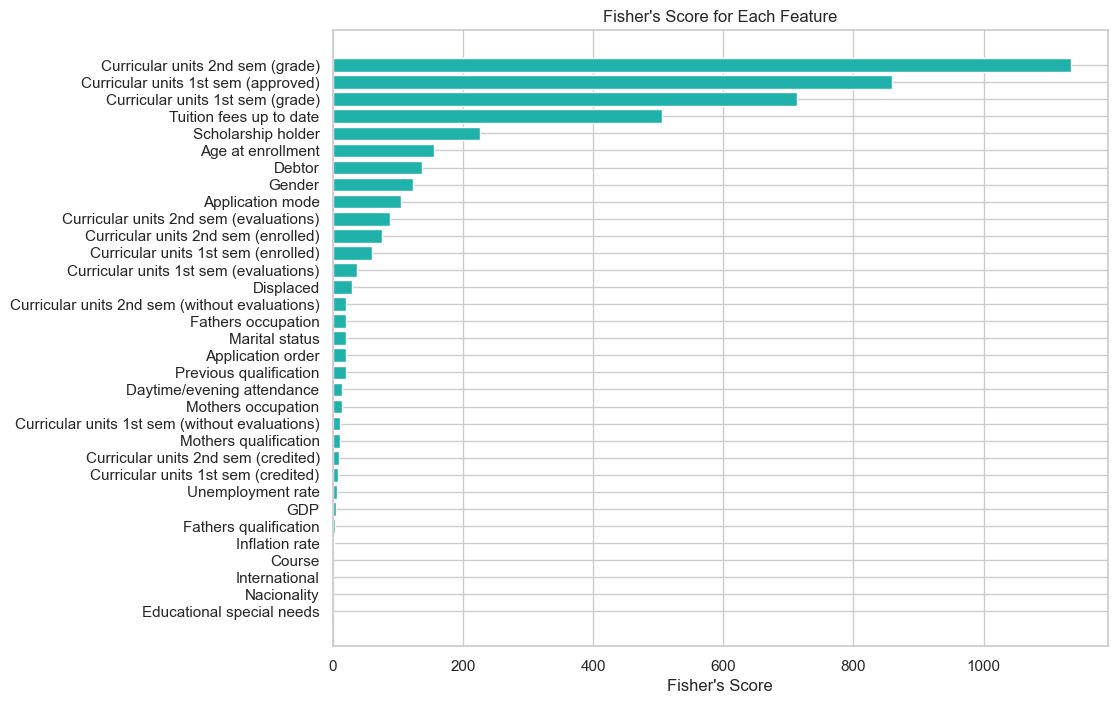

Feature: Curricular units 2nd sem (grade), Score: 1134.1095
Feature: Curricular units 1st sem (approved), Score: 859.8668
Feature: Curricular units 1st sem (grade), Score: 713.5173
Feature: Tuition fees up to date, Score: 505.6214
Feature: Scholarship holder, Score: 225.7514
Feature: Age at enrollment, Score: 154.7121
Feature: Debtor, Score: 137.6475
Feature: Gender, Score: 123.0418
Feature: Application mode, Score: 104.3507
Feature: Curricular units 2nd sem (evaluations), Score: 87.8011
Feature: Curricular units 2nd sem (enrolled), Score: 75.5919
Feature: Curricular units 1st sem (enrolled), Score: 59.4674
Feature: Curricular units 1st sem (evaluations), Score: 37.5278
Feature: Displaced, Score: 29.2392

Mean Accuracy (Cross-Validated): 0.7450


In [57]:
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression

X = df.drop('Target', axis=1)
y = df['Target']

# Calculate Fisher's scores
ranks, pvalues = f_classif(X, y)

# Sort indices based on scores in ascending order
sorted_idx = ranks.argsort()
sorted_features = X.columns[sorted_idx[:-1]]  # Exclude target column
sorted_scores = ranks[sorted_idx]

# Ensure that both arrays have the same number of elements
min_len = min(len(sorted_features), len(sorted_scores))
sorted_features = sorted_features[:min_len]
sorted_scores = sorted_scores[:min_len]

plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_features, sorted_scores, color=['#FF6347' if score < 1 else '#20B2AA' for score in sorted_scores])
plt.xlabel('Fisher\'s Score')
plt.title('Fisher\'s Score for Each Feature')
plt.show()

top_n = 14
top_features = sorted_features[-top_n:][::-1]
top_scores = sorted_scores[-top_n:][::-1]

for feature, score in zip(top_features, top_scores):
    print(f"Feature: {feature}, Score: {score:.4f}")

top_features_df = X[top_features]

lr = LogisticRegression(max_iter=2000)

accuracy_scores = cross_val_score(lr, top_features_df, y, cv=5, scoring='accuracy')

mean_accuracy = accuracy_scores.mean()
print(f"\nMean Accuracy (Cross-Validated): {mean_accuracy:.4f}")

## Mean Absolute Difference

Selected Features:
   Age at enrollment  Curricular units 2nd sem (grade)  \
0                 20                          0.000000   
1                 19                         13.666667   
2                 19                          0.000000   
3                 20                         12.400000   
4                 45                         13.000000   

   Curricular units 1st sem (grade)  Curricular units 1st sem (evaluations)  \
0                          0.000000                                       0   
1                         14.000000                                       6   
2                          0.000000                                       0   
3                         13.428571                                       8   
4                         12.333333                                       9   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                     

C:\Windows\Temp\ipykernel_8984\3973898866.py:5: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_values = X.mad()


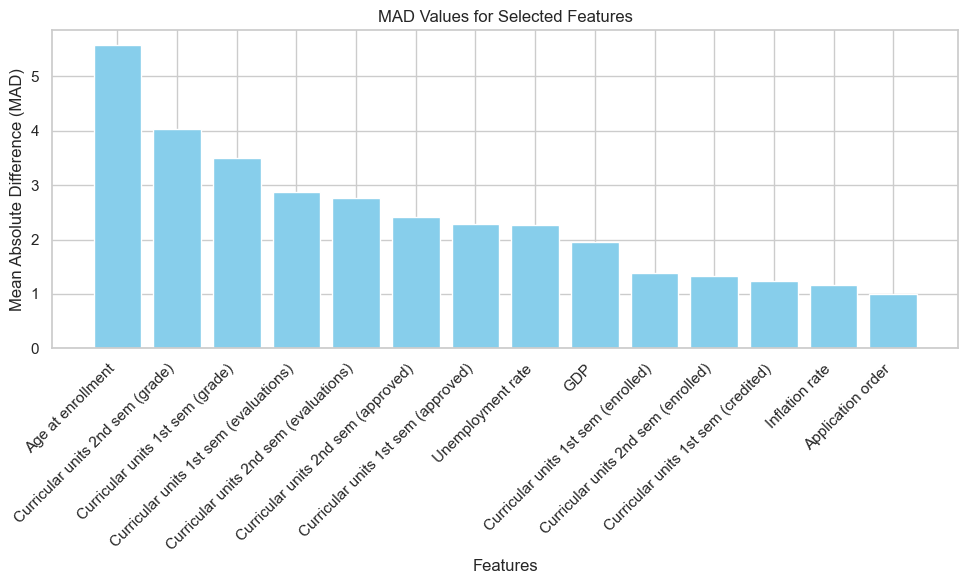


Mean Accuracy (Cross-Validated): 0.7407


In [59]:
X = df.drop('Target', axis=1)
y = df['Target']

# Calculate Mean Absolute Difference (MAD) for each feature
mad_values = X.mad()

threshold = 0.1  

selected_features = mad_values[mad_values >= threshold]

top_n = 14
selected_features = selected_features.nlargest(top_n)

# Create a new DataFrame with selected features
X_selected_mad = X[selected_features.index]

print("Selected Features:")
print(X_selected_mad.head())

plt.figure(figsize=(10, 6))
plt.bar(selected_features.index, selected_features.values, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Mean Absolute Difference (MAD)')
plt.title('MAD Values for Selected Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

lr = LogisticRegression(max_iter=2000)

accuracy_scores = cross_val_score(lr, X_selected_mad, y, cv=5, scoring='accuracy')

mean_accuracy = accuracy_scores.mean()
print(f"\nMean Accuracy (Cross-Validated): {mean_accuracy:.4f}")

## Recursive Feature Elimination


Selected Features:
['Tuition fees up to date', 'Curricular units 2nd sem (approved)', 'International', 'Scholarship holder', 'Curricular units 1st sem (approved)', 'Daytime/evening attendance', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)', 'Educational special needs', 'Curricular units 1st sem (enrolled)', 'Gender', 'Curricular units 2nd sem (credited)', 'Debtor', 'Curricular units 2nd sem (enrolled)']

Most Important Features and Coefficients:
                                           Feature  Coefficient
3                          Tuition fees up to date    -1.608757
12             Curricular units 2nd sem (approved)    -0.557276
6                                    International    -0.391626
5                               Scholarship holder    -0.302960
8              Curricular units 1st sem (approved)    -0.289606
0                       Daytime/evening attendance    -0.251564
9   Curricular units 1st sem (without evaluation

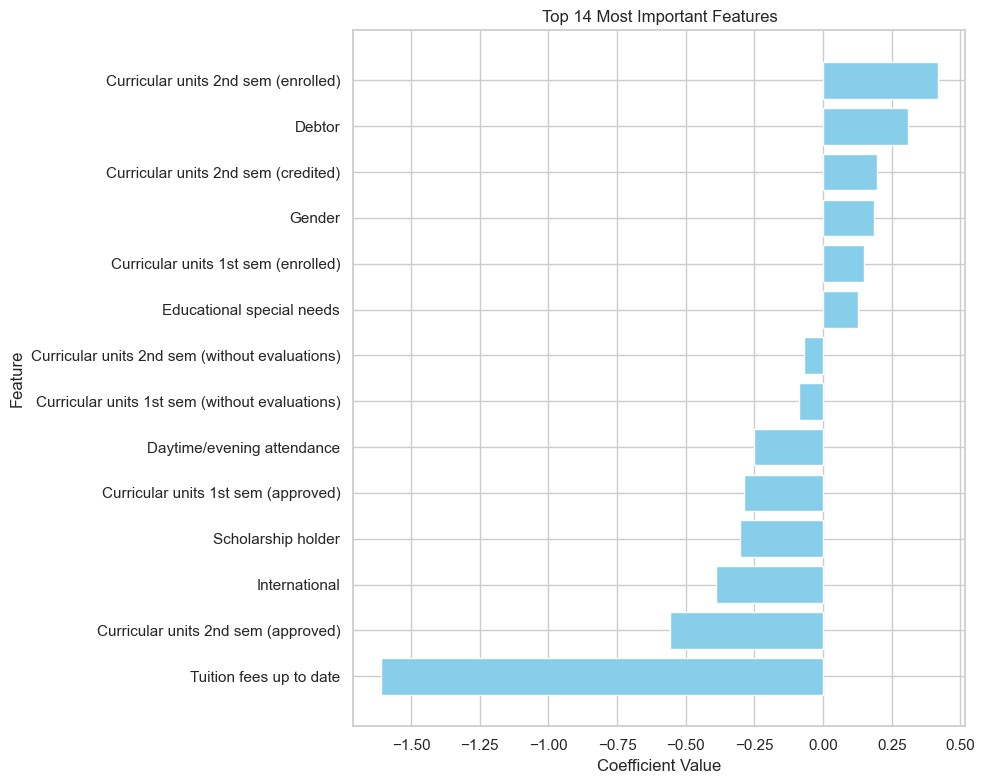

In [60]:
from sklearn.feature_selection import RFE

X = df.drop('Target', axis=1)
y = df['Target']

lr = LogisticRegression(max_iter=2000)

num_features_to_select = 14

rfe = RFE(lr, n_features_to_select=num_features_to_select)

X_rfe = rfe.fit_transform(X, y)

# Get selected feature indices
selected_feature_indices = rfe.get_support(indices=True)

# Get selected feature names
selected_features_rfe = X.columns[selected_feature_indices]

lr.fit(X_rfe, y)

accuracy_scores = cross_val_score(lr, X_rfe, y, cv=5, scoring='accuracy')
mean_accuracy = accuracy_scores.mean()

coefficients = lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': selected_features_rfe, 'Coefficient': coefficients})

feature_importance = feature_importance.sort_values(by='Coefficient', ascending=True)

print("\nSelected Features:")
print(feature_importance['Feature'].tolist())

print("\nMost Important Features and Coefficients:")
print(feature_importance)
print(f"\nMean Accuracy (Cross-Validated): {mean_accuracy:.4f}")

top_n = 14
top_features = feature_importance.tail(top_n)

plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 14 Most Important Features')
plt.tight_layout()
plt.show()

## Selecting Final Set of Features

In [62]:
all_selected_features = [
    selected_features_mi.columns.tolist(),
    selected_features_rf.columns.tolist(),
    top_features_df.columns.tolist(),
    X_selected_mad.columns.tolist(),
    selected_features_rfe.tolist()  
]

features_voting = {}

# Counting votes for each feature
for features in all_selected_features:
    for feature in features:
        features_voting[feature] = features_voting.get(feature, 0) + 1

# Sorting features based on votes in descending order
sorted_features = sorted(features_voting.items(), key=lambda x: x[1], reverse=True)

top_14_features = [feature for feature, _ in sorted_features[:14]]

print("Top Final 14 Features Selected:")
print(top_14_features)

Top Final 14 Features Selected:
['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (evaluations)', 'Tuition fees up to date', 'Curricular units 1st sem (evaluations)', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Scholarship holder', 'Debtor', 'Curricular units 2nd sem (enrolled)', 'Application mode', 'Course']


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\Lenovo\\Desktop\\PROGRAMS\\dataset.csv")

In [6]:
import pandas as pd

# Assuming df is your DataFrame
# For example, df = pd.read_csv('your_data.csv')

# Filter rows where target column equals "Dropout"
dropout_rows = df[df['Target'] == 'Dropout']

# View the first 5 rows
dropout_rows.head(5)

Marital status  Application mode  Application order  Course  \
0                1                 8                  5       2   
2                1                 1                  5       5   
7                1                 9                  4      11   
9                1                 1                  1      10   
12               1                 1                  2      16   

    Daytime/evening attendance  Previous qualification  Nacionality  \
0                            1                       1            1   
2                            1                       1            1   
7                            1                       1            1   
9                            1                       1            1   
12                           1                       1            1   

    Mothers qualification  Fathers qualification  Mothers occupation  ...  \
0                      13                     10                   6  ...   
2                      22                     27                  10  ...   
7                      22                     27                  10  ...   
9                       1                     14                   5  ...   
12                     13                     27                   5  ...   

    Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                     0                                    0   
2                                     0                                    6   
7                                     0                                    5   
9                                     0                                    6   
12                                    0                                    6   

    Curricular units 2nd sem (evaluations)  \
0                                        0   
2                                        0   
7                                        5   
9                                       14   
12                                       0   

    Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                     0                               0.0   
2                                     0                               0.0   
7                                     0                               0.0   
9                                     2                              13.5   
12                                    0                               0.0   

    Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                                0               10.8   
2                                                0               10.8   
7                                                0               15.5   
9                                                0                8.9   
12                                               0               12.7   

    Inflation rate   GDP   Target  
0              1.4  1.74  Dropout  
2              1.4  1.74  Dropout  
7              2.8 -4.06  Dropout  
9              1.4  3.51  Dropout  
12             3.7 -1.70  Dropout  

[5 rows x 35 columns]